<div style="width:100%; overflow:hidden; background-color:#F1F1E6; padding: 10px; border-style: outset; color:#17469e">
    <div style="width: 80%; float: left;">
    <h2 align="center">Universidad de Sonora</h2>
    <hr style="border-width: 3px; border-color:#17469e">
          <h1>Reconocimiento de patrones: Preparación de los datos</h1>          
          <h4>Ramón Soto C. <a href="mailto:rsotoc@moviquest.com/">(rsotoc@moviquest.com)</a></h4>
    </div>
    <div style="float: right;">
    <img src="images/escudo_unison.png">
    </div>
</div>

## Caso de estudio: [*Stack Overflow 2018 Developer Survey*](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey)

Como caso de estudio principal en el presente curso hemos seleccionado la encuesta de desarrolladores 2018 de *Stack Overflow* disponible en [Kaggle](https://www.kaggle.com). En este primer análisis, realizaremos las fases de comprensión del negocio y comprensión de los datos.

### 3. Preparación de los datos


### <span style="color:#313f9e; font-weight: bold;">Selección de los datos:</span>
<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7; ">

De la sección [Verificación de la calidad de los datos](2.2.%20Preparación%20de%20los%20datos%20II.ipynb#verif), recordamos:

</div>

In [1]:
"""
Reconocimiento de patrones: Preparación de los datos
"""

import pandas as pd
import numpy as np
from operator import itemgetter

import plotly as py
import plotly.graph_objs as go
from IPython.display import display, HTML
from collections import Counter

py.offline.init_notebook_mode(connected=True)


pd.set_option('display.max_columns', 130)
pd.set_option('max_colwidth', 80)

In [2]:
# Contabiliza etiquetas
def get_counters(col_name, label):
    full_list = ";".join(col_name)
    each_word = full_list.split(";")
    each_word = Counter(each_word).most_common()
    return pd.DataFrame(each_word, columns = [label, "Participantes"])

def get_counters_numeric(col, label):
    series = col.value_counts()
    return pd.DataFrame({label: list(series.keys()), "Participantes": list(series)}, 
                    columns = [label, "Participantes"])

# Calcular porcentajes
def percent (row, col):
    count = col.count()
    return 100 * row[1] / count

def get_fig_pie(data, hole = 0, pull = 0):
    labels = [w if len(w)<=30 else w[0:30]+"..." for w in data.iloc[:,0]]
    dg = [
        go.Pie(labels=labels, 
               values=data.iloc[0:,1],
               hole = hole,
               pull = pull,
               hoverinfo = "label+percent",
              )
    ]
    layout = go.Layout(
        autosize=False,
        width=750,
        height=500,
    )
    return go.Figure(data=dg, layout=layout)

In [3]:
path = "Data sets/Stack Overflow Survey/"
df = pd.read_csv(path + "survey_results_public.csv", low_memory=False)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB
None


In [4]:
missing = {}
for col in df.describe(include='all'):
    missing[col] = 100*sum(pd.isnull(df[col])) / df.shape[0]
table = sorted(missing.items(), key=itemgetter(1))

data = pd.DataFrame(table, columns=["Columna", "Valores Faltantes (%)"])
display(HTML(data.to_html()))

,Columna,Valores Faltantes (%)
0,Respondent,0.000000
1,Hobby,0.000000
2,OpenSource,0.000000
3,Country,0.416772
4,Employment,3.574933
5,Student,3.999798
6,FormalEducation,4.200091
7,YearsCoding,5.078145
8,DevType,6.835264
9,JobSearchStatus,19.591321


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
¿Qué ocurriría si trabajamos con casos completos?
</div>

In [5]:
print(df.dropna().info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 14793 to 55242
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 6.1+ KB
None


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Utilizar casos completos no es una buena opción. 
<br>
De los resultados presentados en la tabla anterior destacan las variables <code style="background-color:#f7f7f7;">TimeAfterBootcamp</code> y <code style="background-color:#f7f7f7;">MilitaryUS</code> que tienen demasiados valores faltantes y no parecen aportar información importante al entendimiento de la comunidad internacional de desarrolladores de software. <code style="background-color:#f7f7f7;">Respondent</code> tampoco es de interés, pues es tan solo un ID del usuario, específico de la encuesta. Por ello, decidimos eliminar estas tres columnas:
</div>

In [6]:
df = df.drop(['Respondent', 'MilitaryUS', 'TimeAfterBootcamp'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 126 entries, Hobby to SurveyEasy
dtypes: float64(41), object(85)
memory usage: 95.0+ MB
None


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
A continuación, exploramos el resultado de eliminar datos con valores faltantes, con una política estricta:
</div>

In [7]:
print(df.dropna().info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 233 to 71414
Columns: 126 entries, Hobby to SurveyEasy
dtypes: float64(41), object(85)
memory usage: 311.5+ KB
None


<div style="border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Observamos que esta operación elimina el 99.68% de los datos; el primer registro completo es el 233 y el último el 71414. Es decir, esta no es una buena opción, en este caso. Probaremos a continuación otras opciones más conservadoras:
</div>

In [8]:
print(df.dropna(thresh=63).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69300 entries, 0 to 90543
Columns: 126 entries, Hobby to SurveyEasy
dtypes: float64(41), object(85)
memory usage: 67.1+ MB
None


<div style="border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Incluso permitiendo la mitad de variables indefinidas en cada registro, la pérdida de datos es cercana al 30%.
</div>

<br>
<div style="width:100%; overflow:hidden;">
<div style="width:15%; float:left; padding-right:5px; color:blue; font-weight: bold;">
Conclusión:
</div>

<div style="margin-left: 15%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Por el momento, no podemos mejorar la calidad de los datos, de manera que conservamos las columnas restantes.
</div>
</div>

### <span style="color:#313f9e; font-weight: bold;">Limpieza de los datos:</span>
<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La limpieza de datos, se centra principalmente en resolver el problema de valores faltantes. El objetivo es tratar de eliminar esta falla sin corromper los datos. La limpieza generalmente involucra una decisión de compromiso entre estos dos objetivos.
</div>

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:15%; float:left; padding-right:5px; color:blue; font-weight: bold;">
Country:
</div>

<div style="margin-left: 15%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Empezamos analizando la variable 'Country', cuyo porcentaje de valores faltantes es de 0.416772%. Observemos que este valor pudiera deducirse de las variables 'Currency' o 'CurrencySymbol'. 
<br>La cantidad de valores faltantes en 'Country' es:
</div>
</div>

In [9]:
print("Valores faltantes en 'Country':", 
      sum(pd.isnull(df['Country'])),
      "(" + str(round(10000*sum(pd.isnull(df['Country'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'Country': 412 (0.42%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La cantidad de valores faltantes es pequeña, por lo que pueden ignorarse para la mayoría de los cálculos. Antes, observemos que otras variables coinciden en valores faltantes:
</div>

In [10]:
print(df.loc[pd.isnull(df.Country)].describe(include='all'))

       Hobby OpenSource  Country  Student  Employment  FormalEducation  \
count    412        412      0.0      0.0         0.0              0.0   
unique     2          2      0.0      0.0         0.0              0.0   
top      Yes         No      NaN      NaN         NaN              NaN   
freq     262        276      NaN      NaN         NaN              NaN   
mean     NaN        NaN      NaN      NaN         NaN              NaN   
std      NaN        NaN      NaN      NaN         NaN              NaN   
min      NaN        NaN      NaN      NaN         NaN              NaN   
25%      NaN        NaN      NaN      NaN         NaN              NaN   
50%      NaN        NaN      NaN      NaN         NaN              NaN   
75%      NaN        NaN      NaN      NaN         NaN              NaN   
max      NaN        NaN      NaN      NaN         NaN              NaN   

        UndergradMajor  CompanySize  DevType  YearsCoding  YearsCodingProf  \
count              0.0          0

<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Como puede apreciarse, los registros que no respondieron la pregunta relativa al país, no respondieron ninguna otra pregunta, salvo 'Hobby' y 'OpenSource'. 
<br>
La solución en este caso, entonces, es simple: eliminar los registros con el campo 'Country' nulo. Analizamos nuevamente los datos restantes.
</div>

In [11]:
df = df[pd.notnull(df['Country'])]
df = df.reset_index(drop=True)

print(df.info())
missing = {}
for col in df:
    missing[col] = 100*sum(pd.isnull(df[col])) / df.shape[0]
table = sorted(missing.items(), key=itemgetter(1))

data = pd.DataFrame(table, columns=["Columna", "Valores Faltantes (%)"])
display(HTML(data.to_html()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98443 entries, 0 to 98442
Columns: 126 entries, Hobby to SurveyEasy
dtypes: float64(41), object(85)
memory usage: 94.6+ MB
None


,Columna,Valores Faltantes (%)
0,Hobby,0.000000
1,OpenSource,0.000000
2,Country,0.000000
3,Employment,3.171378
4,Student,3.598021
5,FormalEducation,3.799153
6,YearsCoding,4.680881
7,DevType,6.445354
8,JobSearchStatus,19.254797
9,UndergradMajor,19.713946


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:15%; float:left; padding-right:5px; color:blue; font-weight: bold;">
Employment:
</div>

<div style="margin-left: 15%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Otra variable que pudiera ser relativamente simple de limpiar es "Employment". Observemos que los casos de valores faltantes en esta variable pudieran coincidir con los encuestados que  sean estudiantes de tiempo completo y/o con quienes desarrollan por Hobby. En ambos casos, salvo que el encuestado no haya entendido la pregunta y en casos excepcionales en el caso de estudiantes de tiempo completo, es de esperar que debieran haber respondido con una opción de 'no empleado', pero que consideraron innecesario especificar. En cualquier caso, dado el bajo porcentaje de valores nulos, la cantidad de errores sería muy baja.
<br>
Lo primero que analizamos es la cantidad de registros nulos (que corresponden a lo reportado en la tabla):
</div>
</div>

In [12]:
print("Valores faltantes en 'Employment':", 
      sum(pd.isnull(df['Employment'])),
      "(" + str(round(10000*sum(pd.isnull(df['Employment'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'Employment': 3122 (3.17%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Contabilizamos ahora los registros en los que el usuario no contesta la pregunta relacionada a la variable 'Employment' y al mismo tiempo declara ser estudiante de tiempo completo:
</div>

In [13]:
print(df.loc[(pd.isnull(df.Employment)) & (df.Student =='Yes, full-time')].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 80455 to 98424
Columns: 126 entries, Hobby to SurveyEasy
dtypes: float64(41), object(85)
memory usage: 512.0+ KB
None


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
516 registros reportan ser estudiantes de tiempo completo. Es razonable pensar que estos desarrolladores dejaron en blanco la pregunta porque no encontraron una respuesta adecuada, siendo las opciones:
<b><ul>
<li>Not employed, but looking for work</li>
<li>Not employed, and not looking for work</li>
</ul></b>

<br>
Comparemos ahora con los que no contestaron y que declaran se desarrolladores por "hobby":
</div>

In [14]:
print(df.loc[(pd.isnull(df.Employment)) & (df.Hobby =='Yes')].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540 entries, 80455 to 98442
Columns: 126 entries, Hobby to SurveyEasy
dtypes: float64(41), object(85)
memory usage: 2.5+ MB
None


In [15]:
print(df.loc[(pd.isnull(df.Employment)) & 
             ((df.Hobby =='Yes') | (df.Student =='Yes, full-time'))].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 80455 to 98442
Columns: 126 entries, Hobby to SurveyEasy
dtypes: float64(41), object(85)
memory usage: 2.5+ MB
None


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En estos casos, podemos hacer una imputación con el valor 'Not employed, and not looking for work'.
</div>

In [16]:
df['Employment'] = df.apply(
    lambda row: 'Not employed, and not looking for work' 
    if (pd.isnull(row.Employment)) & 
             ((row.Hobby =='Yes') | (row.Student =='Yes, full-time'))
    else row['Employment'],
    axis=1
)

print(df.Employment.describe(), "\n\nValores faltantes en 'Employment':", 
      sum(pd.isnull(df['Employment'])),
      "(" + str(round(10000*sum(pd.isnull(df['Employment'])) / df.shape[0]) / 100)+"%)")

count                  97948
unique                     6
top       Employed full-time
freq                   70495
Name: Employment, dtype: object 

Valores faltantes en 'Employment': 495 (0.5%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Los valores faltantes se han reducido lo suficiente como para no tener que preocuparse. Hagamos una imputación con un valor nuevo 'Non-responded':
</div>

In [17]:
df['Employment'] = df.apply(
    lambda row: 'Non-responded' if pd.isnull(row.Employment) else row['Employment'], axis=1
)

print("Valores faltantes en 'Employment':", 
      sum(pd.isnull(df['Employment'])),
      "(" + str(round(10000*sum(pd.isnull(df['Employment'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'Employment': 0 (0.0%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:15%; float:left; padding-right:5px; color:blue; font-weight: bold;">
Student:
</div>

<div style="margin-left: 15%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En el caso de la variable 'Student', una posible razón de no responder a la pregunta correspondiente, es que el encuestado ya esté laborando (o esté retirado) y que, por lo tanto haya considerado obvio no estar inscrito en un programa educativo (que ofrezca un grado académico). Observemos:
</div>
</div>

In [18]:
print("Valores faltantes en 'Student':", 
      sum(pd.isnull(df['Student'])),
      "(" + str(round(10000*sum(pd.isnull(df['Student'])) / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.Student)) & 
             ((df.Employment =='Employed full-time') | (df.Employment =='Retired')
             | (df.Employment =='Independent contractor, freelancer, or self-employed'))
            ]
print("Valores faltantes en 'Student' con razones 'obvias':", 
      sum(pd.isnull(df1['Student'])),
      "(" + str(round(10000*sum(pd.isnull(df1['Student'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'Student': 3542 (3.6%)
Valores faltantes en 'Student' con razones 'obvias': 1164 (1.18%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En estos casos, es razonable suponer que la respuesta a la pregunta asociada a la variable 'Student' (Are you currently enrolled in a formal, degree-granting college or university program?) es 'No'. Hacemos la imputación a este valor.
</div>

In [19]:
df['Student'] = df.apply(
    lambda row: 'No' 
    if (pd.isnull(row.Student)) & 
             ((row.Employment =='Employed full-time') | (row.Employment =='Retired')
             | (row.Employment =='Independent contractor, freelancer, or self-employed'))
    else row['Student'],
    axis=1
)

<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Otra fuente de esclarecimiento se obtiene de la pregunta 'Which of the following best describes the highest level of formal education that you’ve completed?' (variable 'FormalEducation'). Una posibilidad para que no haya respuesta a esta pregunta, es que el encuestado haya suspendido sus estudios ('I never completed any formal education') o que ya haya terminado de estudiar; si el encuestado ha respondido 'Other doctoral degree (Ph.D, Ed.D., etc.)' hay muy baja posibilidad de equivocarnos si consideramos al encuestado como 'No estudiante', e incluso, si respondió como 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'. Analicemos estas opciones:
</div>

In [20]:
print(df.loc[(pd.isnull(df.Student)) & 
             ((df.FormalEducation =='I never completed any formal education') 
              | (df.FormalEducation =='Other doctoral degree (Ph.D, Ed.D., etc.)')
              | (df.FormalEducation =='Master’s degree (MA, MS, M.Eng., MBA, etc.)'))
            ].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 6259 to 96755
Columns: 126 entries, Hobby to SurveyEasy
dtypes: float64(41), object(85)
memory usage: 97.2+ KB
None


In [21]:
df['Student'] = df.apply(
    lambda row: 'No' 
    if (pd.isnull(row.Student)) & 
             ((row.FormalEducation =='I never completed any formal education') 
              | (row.FormalEducation =='Other doctoral degree (Ph.D, Ed.D., etc.)')
              | (row.FormalEducation =='Master’s degree (MA, MS, M.Eng., MBA, etc.)'))
    else row['Student'],
    axis=1
)

print("Valores faltantes en 'Student':", 
      sum(pd.isnull(df['Student'])),
      "(" + str(round(10000*sum(pd.isnull(df['Student'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'Student': 2280 (2.32%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Los valores faltantes pueden definirse mediante una imputación con el valor 'Non-responded'.
</div>

In [22]:
df['Student'] = df.apply(
    lambda row: 'Non-responded' if pd.isnull(row.Student) else row['Student'], axis=1
)

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
FormalEducation:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Analicemos ahora la distribución de la variable 'FormalEducation': 
</div>
</div>

In [23]:
print(df.FormalEducation.describe(), "\n\nValores faltantes:", 
      sum(pd.isnull(df['FormalEducation'])),
     "(" + str(100*sum(pd.isnull(df['FormalEducation'])) / df.shape[0])+"%)")

data = get_counters(df['FormalEducation'].dropna(), "Educación formal")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.FormalEducation),axis=1)
display(HTML(data.to_html()))

count                                        94703
unique                                           9
top       Bachelor’s degree (BA, BS, B.Eng., etc.)
freq                                         43659
Name: FormalEducation, dtype: object 

Valores faltantes: 3740 (3.7991528092398648%)


,Educación formal,Participantes,Porcentaje
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",43659,46.100968
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",21396,22.592737
2,Some college/university study without earning a degree,11710,12.364973
3,"Secondary school (e.g. American high school, German Realschule or Gymnasium,...",8951,9.451654
4,Associate degree,2970,3.136120
5,"Other doctoral degree (Ph.D, Ed.D., etc.)",2214,2.337835
6,Primary/elementary school,1656,1.748625
7,"Professional degree (JD, MD, etc.)",1447,1.527935
8,I never completed any formal education,700,0.739153


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Puesto que su porcentaje es inferior al 5%, de acuerdo a nuestra regla podemos realizar una medida de imputación simple. Asignando la respuesta más común ('Bachelor’s degree (BA, BS, B.Eng., etc.)') acertaríamos aproximadamente en 46% de los casos y tendríamos valores erróneos en aproximadamente el 2.7% de los datos totales. Adicionalmente, alrededor de 85% de las respuestas corresponden a opciones que podemos clasificar como "Educación superior", siendo "Bachelor" la opción más representativa. De esta manera, es poco lo que arriesgamos al hacer esta imputación:
</div>

In [24]:
df['FormalEducation'] = df.apply(
    lambda row: 'Bachelor’s degree (BA, BS, B.Eng., etc.)' if pd.isnull(row.FormalEducation) 
    else row['FormalEducation'], axis=1
)

print("Valores faltantes en 'FormalEducation':", 
      sum(pd.isnull(df['FormalEducation'])),
      "(" + str(round(10000*sum(pd.isnull(df['FormalEducation'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'FormalEducation': 0 (0.0%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
YearsCoding:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En el caso de la variable 'YearsCoding', dada la cantidad de valores faltantes, podemos hacer una imputación en términos de una medida estadística. Dado que la variable es no numérica, la mejor opción es utilizar la moda, es decir, la respuesta más popular: 
</div>
</div>

In [25]:
print("Valores faltantes en 'YearsCoding':", 
      sum(pd.isnull(df['YearsCoding'])),
      "(" + str(round(10000*sum(pd.isnull(df['YearsCoding'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'YearsCoding': 4608 (4.68%)


In [26]:
data = get_counters(df['YearsCoding'].dropna(), "Años desarrollando")
data['Porcentaje total'] = data.apply (lambda row: percent (row, df['YearsCoding']),axis=1)
display(HTML(data.to_html()))

,Años desarrollando,Participantes,Porcentaje total
0,3-5 years,23313,24.844674
1,6-8 years,19338,20.608515
2,9-11 years,12169,12.968509
3,0-2 years,10682,11.383812
4,12-14 years,8030,8.557574
5,15-17 years,6117,6.518890
6,18-20 years,5072,5.405233
7,30 or more years,3544,3.776842
8,21-23 years,2648,2.821975
9,24-26 years,1862,1.984334


In [27]:
df['YearsCoding'] = df.apply(
    lambda row: '3-5 years' if pd.isnull(row.YearsCoding) else row['YearsCoding'], axis=1
)

print("Valores faltantes en 'YearsCoding':", 
      sum(pd.isnull(df['YearsCoding'])),
      "(" + str(round(10000*sum(pd.isnull(df['YearsCoding'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'YearsCoding': 0 (0.0%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
DevType:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La siguiente variable a limpiar es 'DevType'. Observemos su distribución:
</div>
</div>

In [28]:
print(df['DevType'].describe())
print("\nValores faltantes en 'DevType':", 
      sum(pd.isnull(df['DevType'])),
      "(" + str(round(10000*sum(pd.isnull(df['DevType'])) / df.shape[0]) / 100)+"%)")

data = get_counters(df['DevType'].dropna(), "Tipo de desarrollador")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.DevType),axis=1)
display(HTML(data.to_html()))

count                  92098
unique                  9568
top       Back-end developer
freq                    6417
Name: DevType, dtype: object

Valores faltantes en 'DevType': 6345 (6.45%)


,Tipo de desarrollador,Participantes,Porcentaje
0,Back-end developer,53300,57.873135
1,Full-stack developer,44353,48.158483
2,Front-end developer,34822,37.809724
3,Mobile developer,18804,20.417381
4,Desktop or enterprise applications developer,15807,17.163239
5,Student,15732,17.081804
6,Database administrator,13216,14.349932
7,Designer,12019,13.050229
8,System administrator,10375,11.265174
9,DevOps specialist,9549,10.368303


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Puesto que las respuestas posibles a esta pregunta, listadas en la tabla previa, están estrechamente relacionadas con puestos de trabajo, es de esperar que haya una alta correlación entre los valores nulos de 'DevType' y las respuestas a 'Hobby' y 'Employment'.
Analicemos la coincidencia entre estas variables:
</div>

In [29]:
df1 = df.loc[(pd.isnull(df.DevType)) & (df.Hobby == 'Yes')]
print("\nValores faltantes en 'DevType', con 'Hobby' = 'Yes':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.DevType)) & (df.Employment == 'Retired')]
print("\nValores faltantes en 'DevType', con 'Employment' = 'Retired':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.DevType)) 
             & (df.Employment == 'Not employed, but looking for work')]
print("\nValores faltantes en 'DevType', con 'Employment' = 'Not employed, but looking \
for work':", df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.DevType)) 
             & (df.Employment == 'Not employed, and not looking for work')]
print("\nValores faltantes en 'DevType', con 'Employment' = 'Not employed, and not \
looking for work':", df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.DevType)) 
             & ((df.Hobby == 'Yes') | (df.Employment == 'Retired')
                | (df.Employment == 'Not employed, but looking for work')
                | (df.Employment == 'Not employed, and not looking for work'))]
print("\nValores faltantes en 'DevType' bajo condiciones de 'Hobby' y 'Employment'", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")


Valores faltantes en 'DevType', con 'Hobby' = 'Yes': 4974 (5.05%)

Valores faltantes en 'DevType', con 'Employment' = 'Retired': 45 (0.05%)

Valores faltantes en 'DevType', con 'Employment' = 'Not employed, but looking for work': 281 (0.29%)

Valores faltantes en 'DevType', con 'Employment' = 'Not employed, and not looking for work': 1645 (1.67%)

Valores faltantes en 'DevType' bajo condiciones de 'Hobby' y 'Employment' 5064 (5.14%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En todos estos casos, parece razonable pensar que gran parte de los encuestados que no respondieron la pregunta fue porque no se identificaron con ninguna de las opciones mostradas. Para estos casos haremos una imputación con la etiqueta nueva 'None of these'.
</div>

In [30]:
df['DevType'] = df.apply(
    lambda row: 'None of these' 
    if ((pd.isnull(row.DevType)) & ((row.Hobby == 'Yes') | (row.Employment == 'Retired')
                                  | (row.Employment == 'Not employed, but looking for work')
                                  | (row.Employment == 'Not employed, and not looking for work')
                                  )) else row['DevType'], axis=1
)

print("Valores faltantes en 'DevType':", 
      sum(pd.isnull(df['DevType'])),
      "(" + str(round(10000*sum(pd.isnull(df['DevType'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'DevType': 1281 (1.3%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Dada la cantidad de datos que ahora tienen valor nulo en 'DevType', podemos aplicar una regla de imputación simple. En este caso utilizamos lo que pudiera ser un *valor mínimo*, en este caso la misma etiqueta 'None of these'.
</div>

In [31]:
df['DevType'] = df.apply(
    lambda row: 'None of these' if pd.isnull(row.DevType) else row['DevType'], axis=1
)

print("Valores faltantes en 'DevType':", 
      sum(pd.isnull(df['DevType'])),
      "(" + str(round(10000*sum(pd.isnull(df['DevType'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'DevType': 0 (0.0%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
JobSearchStatus:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Observemos ahora la distribución de la variable 'JobSearchStatus'. De antemano, es de esperar que los valores nulos en este caso estén también asociados a las variables 'Hobby' y 'Employment', por lo que hacemos también ese análisis:
</div>
</div>

In [32]:
print("Valores faltantes en 'JobSearchStatus':", 
      sum(pd.isnull(df['JobSearchStatus'])),
      "(" + str(round(10000*sum(pd.isnull(df['JobSearchStatus'])) / df.shape[0]) / 100)+"%)")

data = get_counters(df['JobSearchStatus'].dropna(), "Estatus de búsqueda de empleo")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.JobSearchStatus),axis=1)
display(HTML(data.to_html()))

Valores faltantes en 'JobSearchStatus': 18955 (19.25%)


,Estatus de búsqueda de empleo,Participantes,Porcentaje
0,"I’m not actively looking, but I am open to new opportunities",47556,59.827899
1,I am not interested in new job opportunities,19296,24.275362
2,I am actively looking for a job,12636,15.896739


In [33]:
df1 = df.loc[(pd.isnull(df.JobSearchStatus)) & (df.Hobby == 'Yes')]
print("\nValores faltantes en 'JobSearchStatus', con 'Hobby' = 'Yes':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.JobSearchStatus)) & (df.Employment == 'Retired')]
print("\nValores faltantes en 'JobSearchStatus', con 'Employment' = 'Retired':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.JobSearchStatus)) 
             & (df.Employment == 'Not employed, and not looking for work')]
print("\nValores faltantes en 'JobSearchStatus', con 'Employment' = 'Not employed, and not \
looking for work':", df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.JobSearchStatus)) 
             & ((df.Hobby == 'Yes') | (df.Employment == 'Retired')
                | (df.Employment == 'Not employed, and not looking for work'))]
print("\nValores faltantes en 'JobSearchStatus' bajo condiciones de 'Hobby' y 'Employment'", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")


Valores faltantes en 'JobSearchStatus', con 'Hobby' = 'Yes': 14843 (15.08%)

Valores faltantes en 'JobSearchStatus', con 'Employment' = 'Retired': 89 (0.09%)

Valores faltantes en 'JobSearchStatus', con 'Employment' = 'Not employed, and not looking for work': 2619 (2.66%)

Valores faltantes en 'JobSearchStatus' bajo condiciones de 'Hobby' y 'Employment' 15007 (15.24%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Se puede observar que gran parte de las respuestas nulas corresponden a encuestados que desarrollan por hobby y/o están retirados y/o empleados pero que no están buscando empleo. Es de suponer que estos usuarios consideraron redundante o no aplicable la pregunta; la respuesta más apropiada para ellos debió ser 'I am not interested in new job opportunities'. 
</div>

In [34]:
df['JobSearchStatus'] = df.apply(
    lambda row: 'I am not interested in new job opportunities' 
    if ((pd.isnull(row.JobSearchStatus)) 
        & ((row.Hobby == 'Yes') | (row.Employment == 'Retired')
           | (row.Employment == 'Not employed, and not looking for work')
          )) else row['JobSearchStatus'], axis=1
)

print("Valores faltantes en 'JobSearchStatus':", 
      sum(pd.isnull(df['JobSearchStatus'])),
      "(" + str(round(10000*sum(pd.isnull(df['JobSearchStatus'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'JobSearchStatus': 3948 (4.01%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Los valores faltantes restantes ahora son inferiores al 5%, por lo cual podríamos hacer una imputación al valor más frecuente, 'I’m not actively looking, but I am open to new opportunities', que demás, resulta ser un tanto neutral. 
</div>

In [35]:
df['JobSearchStatus'] = df.apply(
    lambda row: 'I’m not actively looking, but I am open to new opportunities' 
    if pd.isnull(row.JobSearchStatus) else row['JobSearchStatus'], axis=1
)

print("Valores faltantes en 'JobSearchStatus':", 
      sum(pd.isnull(df['JobSearchStatus'])),
      "(" + str(round(10000*sum(pd.isnull(df['JobSearchStatus'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'JobSearchStatus': 0 (0.0%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
UndergradMajor:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Observemos ahora la distribución de la variable 'JobSearchStatus'. De antemano, es de esperar La distribución de respuestas de la variable 'UndergradMajor' es: 
</div>
</div>

In [36]:
print("Valores faltantes en 'UndergradMajor':", 
      sum(pd.isnull(df['UndergradMajor'])),
      "(" + str(round(10000*sum(pd.isnull(df['UndergradMajor'])) / df.shape[0]) / 100)+"%)")

data = get_counters(df['UndergradMajor'].dropna(), "Campo de especialidad")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.UndergradMajor),axis=1)
display(HTML(data.to_html()))

Valores faltantes en 'UndergradMajor': 19407 (19.71%)


,Campo de especialidad,Participantes,Porcentaje
0,"Computer science, computer engineering, or software engineering",50336,63.687434
1,"Another engineering discipline (ex. civil, electrical, mechanical)",6945,8.787135
2,"Information systems, information technology, or system administration",6507,8.232957
3,"A natural science (ex. biology, chemistry, physics)",3050,3.859001
4,Mathematics or statistics,2818,3.565464
5,Web development or web design,2418,3.059365
6,"A business discipline (ex. accounting, finance, marketing)",1921,2.430538
7,"A humanities discipline (ex. literature, history, philosophy)",1590,2.011741
8,"A social science (ex. anthropology, psychology, political science)",1377,1.742244
9,"Fine arts or performing arts (ex. graphic design, music, studio art)",1135,1.436054


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Una relación obvia ocurre entre 'UndergradMajor' y 'FormalEducation'; si el encuestado no realizó estudios profesionales no tiene sentido el área de especialidad. Analicemos la relación entre ambas variables (antes, recuperamos la cadena completa de la etiqueta 'Secondary school (e.g. American high school, German Realschule or Gymnasium,...'):
</div>

In [37]:
data = get_counters(df['FormalEducation'].dropna(), "Educación formal")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.FormalEducation),axis=1)
 
print(data['Educación formal'][3])

Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)


In [38]:
df1 = df.loc[(pd.isnull(df.UndergradMajor)) 
            & (df.FormalEducation == 'I never completed any formal education')]
print("\nValores faltantes en 'UndergradMajor', con 'FormalEducation' = 'I never \
completed any formal education':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.UndergradMajor)) 
            & (df.FormalEducation == 'Primary/elementary school')]
print("\nValores faltantes en 'UndergradMajor', con 'FormalEducation' = \
'Primary/elementary school:", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.UndergradMajor)) 
             & (df.FormalEducation == 'Secondary school (e.g. American high school, \
German Realschule or Gymnasium, etc.)')]
print("\nValores faltantes en 'UndergradMajor', con 'FormalEducation' = 'Secondary \
school (e.g. American high school, German Realschule or Gymnasium, etc.)':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.UndergradMajor)) 
             & ((df.FormalEducation == 'I never completed any formal education')
                | (df.FormalEducation == 'Primary/elementary school')
                | (df.FormalEducation == 'Secondary school (e.g. American high school, \
German Realschule or Gymnasium, etc.)'))]
print("\nValores faltantes en 'UndergradMajor' bajo condiciones de 'FormalEducation'", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")


Valores faltantes en 'UndergradMajor', con 'FormalEducation' = 'I never completed any formal education': 700 (0.71%)

Valores faltantes en 'UndergradMajor', con 'FormalEducation' = 'Primary/elementary school: 1656 (1.68%)

Valores faltantes en 'UndergradMajor', con 'FormalEducation' = 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 8951 (9.09%)

Valores faltantes en 'UndergradMajor' bajo condiciones de 'FormalEducation' 11307 (11.49%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En los casos analizados, no tiene es aplicable la definición de un área de especialidad. Para fines del análisis de la encuesta, una respuesta apropiada sería 'None':
</div>

In [39]:
df['UndergradMajor'] = df.apply(
    lambda row: 'None' 
    if ((pd.isnull(row.UndergradMajor)) 
        & ((row.FormalEducation == 'I never completed any formal education') 
           | (row.FormalEducation == 'Primary/elementary school')
           | (row.FormalEducation == 'Secondary school (e.g. American high school, \
German Realschule or Gymnasium, etc.)')
          )) else row['UndergradMajor'], axis=1
)

print("Valores faltantes en 'UndergradMajor':", 
      sum(pd.isnull(df['UndergradMajor'])),
      "(" + str(round(10000*sum(pd.isnull(df['UndergradMajor'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'UndergradMajor': 8100 (8.23%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
El porcentaje de valores faltantes se reduce significativamente, pero sigue estando por arriba de lo que consideramos un caso manejable simple. Por el momento, no hacemos más modificaciones.
</div>

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:15%; float:left; padding-right:5px; color:blue; font-weight: bold;">
LastNewJob:
</div>

<div style="margin-left: 15%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La distribución de respuestas de la variable 'LastNewJob' es:
</div>
</div>

In [40]:
print("Valores faltantes en 'LastNewJob':", 
      sum(pd.isnull(df['LastNewJob'])),
      "(" + str(round(10000*sum(pd.isnull(df['LastNewJob'])) / df.shape[0]) / 100)+"%)")

data = get_counters(df['LastNewJob'].dropna(), "Tiempo en el nuevo empleo")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.LastNewJob), axis=1)
display(HTML(data.to_html()))

Valores faltantes en 'LastNewJob': 19554 (19.86%)


,Tiempo en el nuevo empleo,Participantes,Porcentaje
0,Less than a year ago,27321,34.632205
1,Between 1 and 2 years ago,17332,21.970110
2,More than 4 years ago,14871,18.850537
3,Between 2 and 4 years ago,14792,18.750396
4,I've never had a job,4573,5.796752


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
De las etiquetas mostradas, observamos que no hay opciones claras para quien ya está retirado o para quien ya ha trabajado, pero actualmente está desempleado. Así mismo, de acuerdo a la pregunta ('When was the last time that you took a job with a new employer?'), tampoco queda clara una opción para quienes trabajan por su cuenta. Analicemos estas relaciones: 
</div>

In [41]:
df1 = df.loc[(pd.isnull(df.LastNewJob)) & (df.Employment == 'Retired')]
print("\nValores faltantes en 'LastNewJob', con 'Employment' = 'Retired':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.LastNewJob)) 
            & (df.Employment == 'Independent contractor, freelancer, or self-employed')]
print("\nValores faltantes en 'LastNewJob' con 'Employment' = 'Independent \
contractor, freelancer, or self-employed':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.LastNewJob)) 
             & (df.Employment == 'Not employed, but looking for work')]
print("\nValores faltantes en 'LastNewJob', con 'Employment' = 'Not employed, but \
looking for work':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.LastNewJob)) 
             & (df.Employment == 'Not employed, and not looking for work')]
print("\nValores faltantes en 'LastNewJob' con 'Employment' = 'Not employed, and not \
looking for work'", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")


Valores faltantes en 'LastNewJob', con 'Employment' = 'Retired': 89 (0.09%)

Valores faltantes en 'LastNewJob' con 'Employment' = 'Independent contractor, freelancer, or self-employed': 1588 (1.61%)

Valores faltantes en 'LastNewJob', con 'Employment' = 'Not employed, but looking for work': 1262 (1.28%)

Valores faltantes en 'LastNewJob' con 'Employment' = 'Not employed, and not looking for work' 2753 (2.8%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Hacemos una imputación, en estos casos, con la etiqueta 'Not employed':
</div>

In [42]:
df['LastNewJob'] = df.apply(
    lambda row: 'Not employed' 
    if ((pd.isnull(row.LastNewJob)) 
        & ((row.Employment == 'Retired') 
           | (row.Employment == 'Independent contractor, freelancer, or \
self-employed')
           | (row.Employment == 'Not employed, but looking for work')
           | (row.Employment == 'Not employed, and not looking for work')
          )) else row['LastNewJob'], axis=1
)

print("Valores faltantes en 'LastNewJob':", 
      sum(pd.isnull(df['LastNewJob'])),
      "(" + str(round(10000*sum(pd.isnull(df['LastNewJob'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'LastNewJob': 13862 (14.08%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Por el momento, no hacemos otras modificaciones.
</div>

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:25%; float:left; padding-right:5px; color:blue; font-weight: bold;">
LanguageWorkedWith:
</div>

<div style="margin-left: 25%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
El caso de la variable 'LanguageWorkedWith' es más raro; tratándose de una encuesta a desarrolladores, se esperaría que este reactivo tuviera muy pocos valores vacíos, sin embargo el porcentaje es alto:
</div>
</div>

In [43]:
print("Valores faltantes en 'LanguageWorkedWith':", 
      sum(pd.isnull(df['LanguageWorkedWith'])),
      "(" + str(round(10000*sum(pd.isnull(df['LanguageWorkedWith'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'LanguageWorkedWith': 20109 (20.43%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Pudiéramos esperar que estos valores faltantes correspondan a usuarios que no son desarrolladores, sino que ocupan puestos administrativos. Analicemos la relación con la variable 'DevType':
</div>

In [44]:
df1 = df.loc[pd.isnull(df.LanguageWorkedWith)]

data = get_counters(df1['DevType'].dropna(), "Tipo de desarrollador")
data['Porcentaje en nulos'] = data.apply (lambda row: percent (row, df1.DevType), axis=1)
# Obtener lista ordenada de etiquetas en data
sorter = list(data['Tipo de desarrollador'])

d2 = get_counters(df['DevType'].dropna(), "Tipo de desarrollador")
d2['Porcentaje'] = d2.apply (lambda row: percent (row, df.DevType),axis=1)
# Definir valores en la columna como tipo categórico
d2['Tipo de desarrollador'] = d2['Tipo de desarrollador'].astype("category")
# Definir orden de etiqueta según a lista sorter
d2['Tipo de desarrollador'].cat.set_categories(sorter, inplace=True)
# Reordenar de acuerdo con sorter (data)... reindexar
d2 = d2.sort_values(['Tipo de desarrollador']).reset_index(drop=True)

data['Porcentaje global'] = d2['Porcentaje']
display(HTML(data.to_html()))

,Tipo de desarrollador,Participantes,Porcentaje en nulos,Porcentaje global
0,Back-end developer,8164,40.598737,54.143007
1,Full-stack developer,6494,32.293998,45.054499
2,Front-end developer,5517,27.435477,35.372754
3,None of these,4876,24.247849,6.445354
4,Student,3343,16.624397,15.980821
5,Mobile developer,3209,15.958029,19.101409
6,Desktop or enterprise applications developer,2077,10.328709,16.057008
7,Designer,2068,10.283952,12.209096
8,Database administrator,1959,9.741907,13.425028
9,System administrator,1492,7.419563,10.539094


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Puede observarse que, en términos generales, la distribución de respuestas sobre tipo de desarrollador es la misma para los valores nulos que para el conjunto completo de datos, lo cual significa que no hay una correspondencia de los datos con valores nulos en 'LanguageWorkedWith' con alguno de los subgrupos por tipo de desarrollador. No podemos, por lo pronto, hacer suposiciones razonables.
<br>
Analicemos con más detenimiento la calidad de estos datos:
</div>

In [45]:
df1 = pd.read_csv(path + "survey_results_public.csv", low_memory=False)
df1 = df1.drop(['Respondent', 'MilitaryUS', 'TimeAfterBootcamp'], axis=1)

rows = df1.shape[0]
rowsActual = df.dropna(thresh=63).shape[0]

df1 = df1.loc[pd.isnull(df1.LanguageWorkedWith)]
rows1 = df1.shape[0]
rowsOK = df1.dropna(thresh=63).shape[0]

print("Registros con al menos la mitad de columnas no nulas:",
      "\n* En registros con 'LanguageWorkedWith' nulo:",
      rowsOK, '(' + str(round(10000 * rowsOK / rows1) / 100) + '%; ' 
      + str(round(10000 * rowsOK / rows) / 100) + '% del total)',
           "\n* En la base de datos completa:", rowsActual,
      '(' + str(round(10000 * rowsActual / rows) / 100) + '%)'
)

Registros con al menos la mitad de columnas no nulas: 
* En registros con 'LanguageWorkedWith' nulo: 880 (4.29%; 0.89% del total) 
* En la base de datos completa: 69435 (70.24%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
De este análisis, observamos que los datos que tienen valor nulo en 'LanguageWorkedWith' tienen también valores nulos en muchas de sus otras columnas. A continuación presentamos las estadísticas de todas las columnas para los datos con valor nulo en 'LanguageWorkedWith':
</div>

In [46]:
print(df1.describe(include='all'))

        Hobby OpenSource Country Student          Employment  \
count   20521      20521   20109   17846               17963   
unique      2          2     166       3                   6   
top       Yes         No   India      No  Employed full-time   
freq    16020      12141    4064   11632               12565   
mean      NaN        NaN     NaN     NaN                 NaN   
std       NaN        NaN     NaN     NaN                 NaN   
min       NaN        NaN     NaN     NaN                 NaN   
25%       NaN        NaN     NaN     NaN                 NaN   
50%       NaN        NaN     NaN     NaN                 NaN   
75%       NaN        NaN     NaN     NaN                 NaN   
max       NaN        NaN     NaN     NaN                 NaN   

                                 FormalEducation  \
count                                      17889   
unique                                         9   
top     Bachelor’s degree (BA, BS, B.Eng., etc.)   
freq                   

<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Al analizar este listado, observamos que muchas de las variables de mayor interés para los objetivos de negocio, presentan también gran cantidad de valores nulos para los datos con valor nulo en 'LanguageWorkedWith'. Por lo tanto, una posibilidad es eliminar estos renglones, operación que postergamos, por el momento.
</div>

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:25%; float:left; padding-right:5px; color:blue; font-weight: bold;">
YearsCodingProf:
</div>

<div style="margin-left: 25%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Las estadísticas de la variable 'YearsCodingProf' son:
</div>
</div>

In [47]:
print("Valores faltantes en 'YearsCodingProf':", 
      sum(pd.isnull(df['YearsCodingProf'])),
      "(" + str(round(10000*sum(pd.isnull(df['YearsCodingProf'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'YearsCodingProf': 20540 (20.86%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Por el momento, dado el porcentaje de datos involucrados, no podemos hacer una imputación simple, como en el caso de 'YearsCoding'. Antes analicemos su relación con 'Hobby' y 'Student':
</div>

In [48]:
df1 = df.loc[(pd.isnull(df.YearsCodingProf)) & (df.Hobby == 'Yes')]
print("\nValores faltantes en 'YearsCodingProf', con 'Hobby' = 'Yes':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.YearsCodingProf)) & (df.Student =='Yes, full-time')]
print("\nValores faltantes en 'YearsCodingProf', con 'Student' ='Yes, full-time':", 
      df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.YearsCodingProf)) 
             & ((df.Hobby =='Yes') | (df.Student =='Yes, full-time'))]
print("\nValores faltantes en 'YearsCodingProf' con ambas condiciones:", df1.shape[0],
      "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")


Valores faltantes en 'YearsCodingProf', con 'Hobby' = 'Yes': 16242 (16.5%)

Valores faltantes en 'YearsCodingProf', con 'Student' ='Yes, full-time': 5923 (6.02%)

Valores faltantes en 'YearsCodingProf' con ambas condiciones: 17427 (17.7%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Estos registros corresponden a encuestados que no trabajan profesionalmente como desarrolladores. Imputémosle como valor la etiqueta 'None':
</div>

In [49]:
df['YearsCodingProf'] = df.apply(
    lambda row: 'None' 
    if ((pd.isnull(row.YearsCodingProf)) 
        & ((row.Hobby =='Yes') | (row.Student =='Yes, full-time') )) 
    else row['YearsCodingProf'], axis=1
)

print("Valores faltantes en 'YearsCodingProf':", 
      sum(pd.isnull(df['YearsCodingProf'])),
      "(" + str(round(10000*sum(pd.isnull(df['YearsCodingProf'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'YearsCodingProf': 3113 (3.16%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Ahora podemos utilizar la moda como valor de imputación para los valores restantes: 
</div>

In [50]:
df['YearsCodingProf'] = df.apply(
    lambda row: '0-2 years' if pd.isnull(row.YearsCodingProf) 
    else row['YearsCodingProf'], axis=1
)

print("Valores faltantes en 'YearsCodingProf':", 
      sum(pd.isnull(df['YearsCodingProf'])),
      "(" + str(round(10000*sum(pd.isnull(df['YearsCodingProf'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'YearsCodingProf': 0 (0.0%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:30%; float:left; padding-right:5px; color:blue; font-weight: bold;">
StackOverflowRecommend<br>
StackOverflowVisit<br>
StackOverflowHasAccount<br>
StackOverflowParticipate<br>
StackOverflowJobs<br>
StackOverflowDevStory<br>
StackOverflowJobsRecommend<br>
StackOverflowConsiderMember<br>
</div>

<div style="margin-left: 30%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Estas variables tienen grandes cantidades de valores faltantes, pero pocas posibilidades de recuperar información "razonablemente obvia". 
<br><br>En el caso de 'StackOverflowJobsRecommend' y 'StackOverflowJobs' existe una posible relación entre quienes no respondieron la pregunta 'How likely is it that you would recommend Stack Overflow Jobs to a friend or colleague? Where 0 is not likely at all and 10 is very likely' (variable 'StackOverflowJobsRecommend') y quienes respondieron alguna de las dos opciones negativas en 'StackOverflowJobs'. Exploremos esta relación:
</div>
</div>

In [51]:
data = get_counters(df['StackOverflowJobsRecommend'].dropna(), 
                    "Recomendaría Stack Overflow Jobs")
data['Porcentaje'] = data.apply (lambda row: 
                                 percent (row, df.StackOverflowJobsRecommend),axis=1)
display(HTML(data.to_html()))

data = get_counters(df['StackOverflowJobs'].dropna(), "Ha visitado Stack Overflow Jobs")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.StackOverflowJobs),axis=1)
display(HTML(data.to_html()))

print("\nValores faltantes en 'StackOverflowJobsRecommend':", 
      sum(pd.isnull(df['StackOverflowJobsRecommend'])),
      "(" + str(round(10000*sum(pd.isnull(df['StackOverflowJobsRecommend'])) 
                      / df.shape[0]) / 100)+"%)")

df1 = df.loc[pd.isnull(df.StackOverflowJobsRecommend) 
             & pd.notnull(df.StackOverflowJobs) & (df.StackOverflowJobs != 'Yes')]
print("Valores faltantes en 'StackOverflowJobsRecommend' con 'StackOverflowJobs' != 'Yes':",
     str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%")

,Recomendaría Stack Overflow Jobs,Participantes,Porcentaje
0,10 (Very Likely),10137,26.455620
1,5,5963,15.562283
2,7,5429,14.168646
3,8,5194,13.555341
4,6,3782,9.870293
5,9,2677,6.986455
6,3,1315,3.431897
7,0 (Not Likely),1236,3.225722
8,4,1162,3.032596
9,2,1047,2.732469


,Ha visitado Stack Overflow Jobs,Participantes,Porcentaje
0,Yes,38727,51.432328
1,"No, I knew that Stack Overflow had a jobs board but have never used or visit...",26968,35.815504
2,"No, I didn't know that Stack Overflow had a jobs board",9602,12.752168



Valores faltantes en 'StackOverflowJobsRecommend': 60126 (61.08%)
Valores faltantes en 'StackOverflowJobsRecommend' con 'StackOverflowJobs' != 'Yes': 37.15%


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Como puede observarse, más de la mitad de quienes no respondieron la pregunta para 'StackOverflowJobsRecommend' no conocen el servicio. Dado que las opciones van de 0 ('not likely') a 10 (very likely), podemos tomar una consideración intermedia (5), que además es el segundo valor más común entre quienes contestaron. La decisión es la más arriesgada que hemos hecho, por la cantidad de registros involucrados. Un argumento en contra de esta decisión es que las respuestas no nulas no están distribuidas simétricamente en torno a 5. Por otra parte, observamos que casi el 75% de quienes no respondieron la pregunta y que si contestaron la pregunta para 'StackOverflowJobs', respondieron conocer el servicio, pero no haberlo visitado, lo cual refleja poco interés en el servicio y pocas posibilidades de que lo visiten en el futuro cercano y lo recomienden.
</div>

In [52]:
df['StackOverflowJobsRecommend'] = df.apply(
    lambda row: '5' if ((pd.isnull(row.StackOverflowJobsRecommend)) 
        & pd.notnull(row.StackOverflowJobs) & (row.StackOverflowJobs != 'Yes')) 
    else row['StackOverflowJobsRecommend'], axis=1
)

print("Valores faltantes en 'StackOverflowJobsRecommend':", 
      sum(pd.isnull(df['StackOverflowJobsRecommend'])),
      "(" + str(round(10000*sum(pd.isnull(df['StackOverflowJobsRecommend'])) 
                      / df.shape[0]) / 100)+"%)")

Valores faltantes en 'StackOverflowJobsRecommend': 23556 (23.93%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:25%; float:left; padding-right:5px; color:blue; font-weight: bold;">
AssessJob1 - AssessJob10:
</div>

<div style="margin-left: 25%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Las variables relacionadas con la evaluación de oportunidades de empleo ('AssessJob1' a 'AssessJob10') tienen una misma cantidad, grande, de valores faltantes. En este caso, vale la pena comparar contra 'Employment':
</div>
</div>

In [53]:
print("Valores faltantes en 'AssessJob1':",
     str(round(10000*sum(pd.isnull(df['AssessJob1'])) / df.shape[0]) / 100)+"%")

df1 = df.loc[(pd.isnull(df.AssessJob1))  & 
             (df.JobSearchStatus =='I am not interested in new job opportunities')]
print("Valores faltantes para encuestados no interesados en ofertas de trabajo:", 
      str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%")

Valores faltantes en 'AssessJob1': 31.96%
Valores faltantes para encuestados no interesados en ofertas de trabajo: 18.4%


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Como puede apreciarse, una gran cantidad de quienes no respondieron la pregunta correspondiente a la variable 'AssessJob1' contestaron 'I am not interested in new job opportunities' en la pregunta sobre búsqueda de empleo. En este caso, podemos asignar un valor de 0 a los valores faltantes de este grupo de variables:
</div>

In [54]:
columns = ['AssessJob' + str(i) for i in range(1, 11)]
for col in columns:
    df[col] = df.apply(
        lambda row: 0 
        if ((pd.isnull(row[col])) 
            & (row.JobSearchStatus =='I am not interested in new job opportunities') )
        else row[col], axis=1)    
    print("Valores faltantes en '" + col + "':",
          str(round(10000*sum(pd.isnull(df[col])) / df.shape[0]) / 100)+"%")

Valores faltantes en 'AssessJob1': 13.56%
Valores faltantes en 'AssessJob2': 13.56%
Valores faltantes en 'AssessJob3': 13.56%
Valores faltantes en 'AssessJob4': 13.56%
Valores faltantes en 'AssessJob5': 13.56%
Valores faltantes en 'AssessJob6': 13.56%
Valores faltantes en 'AssessJob7': 13.56%
Valores faltantes en 'AssessJob8': 13.56%
Valores faltantes en 'AssessJob9': 13.56%
Valores faltantes en 'AssessJob10': 13.56%


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:25%; float:left; padding-right:5px; color:blue; font-weight: bold;">
AssessBenefits<br>
JobEmailPriorities<br>
JobContactPriorities1
</div>

<div style="margin-left: 25%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Las variables 'AssessBenefits1'-'AssessBenefits11', 'JobEmailPriorities1'-'JobEmailPriorities7' y 'JobContactPriorities1'-'JobContactPriorities5' presentan una situación similar a 'AssessJob-x'. Tomamos la misma decisión:
</div>
</div>

In [55]:
print("Valores faltantes en 'AssessBenefits1':",
     str(round(10000*sum(pd.isnull(df['AssessBenefits1'])) / df.shape[0]) / 100)+"%")

df1 = df.loc[(pd.isnull(df.AssessBenefits1))  & 
             (df.JobSearchStatus =='I am not interested in new job opportunities')]
print("Valores faltantes en 'AssessJob1':", 
      str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%")

Valores faltantes en 'AssessBenefits1': 34.06%
Valores faltantes en 'AssessJob1': 18.91%


In [56]:
columns = ['AssessBenefits' + str(i) for i in range(1, 12)]
for col in columns:
    df[col] = df.apply(
        lambda row: 0 
        if ((pd.isnull(row[col])) 
            & (row.JobSearchStatus =='I am not interested in new job opportunities') )
        else row[col], axis=1)    
    print("Valores faltantes en '" + col + "':",
          str(round(10000*sum(pd.isnull(df[col])) / df.shape[0]) / 100)+"%")

Valores faltantes en 'AssessBenefits1': 15.15%
Valores faltantes en 'AssessBenefits2': 15.15%
Valores faltantes en 'AssessBenefits3': 15.15%
Valores faltantes en 'AssessBenefits4': 15.15%
Valores faltantes en 'AssessBenefits5': 15.15%
Valores faltantes en 'AssessBenefits6': 15.15%
Valores faltantes en 'AssessBenefits7': 15.15%
Valores faltantes en 'AssessBenefits8': 15.15%
Valores faltantes en 'AssessBenefits9': 15.15%
Valores faltantes en 'AssessBenefits10': 15.15%
Valores faltantes en 'AssessBenefits11': 15.15%


In [57]:
print("Valores faltantes en 'JobEmailPriorities1':",
     str(round(10000*sum(pd.isnull(df['JobEmailPriorities1'])) / df.shape[0]) / 100)+"%")

df1 = df.loc[(pd.isnull(df.JobEmailPriorities1))  & 
             (df.JobSearchStatus =='I am not interested in new job opportunities')]
print("Valores faltantes en 'JobEmailPriorities1':", 
      str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%")

Valores faltantes en 'JobEmailPriorities1': 53.06%
Valores faltantes en 'JobEmailPriorities1': 34.85%


In [58]:
columns = ['JobEmailPriorities' + str(i) for i in range(1, 8)]
for col in columns:
    df[col] = df.apply(
        lambda row: 0 
        if ((pd.isnull(row[col])) 
            & (row.JobSearchStatus =='I am not interested in new job opportunities') )
        else row[col], axis=1)    
    print("Valores faltantes en '" + col + "':",
          str(round(10000*sum(pd.isnull(df[col])) / df.shape[0]) / 100)+"%")

Valores faltantes en 'JobEmailPriorities1': 18.21%
Valores faltantes en 'JobEmailPriorities2': 18.21%
Valores faltantes en 'JobEmailPriorities3': 18.21%
Valores faltantes en 'JobEmailPriorities4': 18.21%
Valores faltantes en 'JobEmailPriorities5': 18.21%
Valores faltantes en 'JobEmailPriorities6': 18.21%
Valores faltantes en 'JobEmailPriorities7': 18.21%


In [59]:
print("Valores faltantes en 'JobContactPriorities1':",
     str(round(10000*sum(pd.isnull(df['JobContactPriorities1'])) / df.shape[0]) / 100)+"%")

df1 = df.loc[(pd.isnull(df.JobContactPriorities1))  & 
             (df.JobSearchStatus =='I am not interested in new job opportunities')]
print("Valores faltantes en 'JobContactPriorities1':", 
      str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%")

Valores faltantes en 'JobContactPriorities1': 50.52%
Valores faltantes en 'JobContactPriorities1': 34.85%


In [60]:
columns = ['JobContactPriorities' + str(i) for i in range(1, 6)]
for col in columns:
    df[col] = df.apply(
        lambda row: 0 
        if ((pd.isnull(row[col])) 
            & (row.JobSearchStatus =='I am not interested in new job opportunities') )
        else row[col], axis=1)    
    print("Valores faltantes en '" + col + "':",
          str(round(10000*sum(pd.isnull(df[col])) / df.shape[0]) / 100)+"%")

Valores faltantes en 'JobContactPriorities1': 15.68%
Valores faltantes en 'JobContactPriorities2': 15.68%
Valores faltantes en 'JobContactPriorities3': 15.68%
Valores faltantes en 'JobContactPriorities4': 15.68%
Valores faltantes en 'JobContactPriorities5': 15.68%


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:15%; float:left; padding-right:5px; color:blue; font-weight: bold;">
Salary:
</div>

<div style="margin-left: 15%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La variable 'Salary' tiene varios problemas. El primero de ellos es una gran cantidad de valores faltantes, que, sin embargo, pueden mejorarse tomando en cuentas los valores en las variables 'Hobby' y 'Employment'. El primer análisis es determinar cuantos de los que no respondieron la pregunta es porque no trabajan:
</div>
</div>

In [61]:
print("Valores faltantes en 'Salary':",
     str(round(10000*sum(pd.isnull(df['Salary'])) / df.shape[0]) / 100)+"%")

df1 = df.loc[(pd.isnull(df.Salary))  & 
             ((df.Hobby == 'Yes') | (df.Employment == 'Retired')
                | (df.Employment == 'Not employed, but looking for work')
                | (df.Employment == 'Not employed, and not looking for work')
             )]
print("Valores faltantes para encuestados que no trabajan:", 
      str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%")

Valores faltantes en 'Salary': 48.62%
Valores faltantes para encuestados que no trabajan: 40.16%


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En estos casos, imputaremos el valor '0' a los valores faltantes:
</div>

In [62]:
df['Salary'] = df.apply(
    lambda row: '0' 
    if ((pd.isnull(row.Salary)) 
        & ((row.Hobby == 'Yes') | (row.Employment == 'Retired') 
           | (row.Employment == 'Not employed, but looking for work')
           | (row.Employment == 'Not employed, and not looking for work')
          )) else row['Salary'], axis=1
)

print("Valores faltantes:", 
      sum(pd.isnull(df['Salary'])),
     "(" + str(round(10000*sum(pd.isnull(df['Salary'])) / df.shape[0]) / 100)+"%)")

Valores faltantes: 8332 (8.46%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Con los registros restantes, no podemos hacer nada por el momento para limpiar los valores faltantes.
<br>
Otro problema de esta variable, sin embargo, es la presencia de valores atípicos, lo cual ilustramos mostrando las cadenas más largas en los registros:
</div>

In [63]:
salary_list = df['Salary'].dropna().value_counts().index.tolist()
sorted_list = sorted(salary_list, key = len, reverse=True)
print(sorted_list[:20])

['1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '01101001011011010110000101110011011101000111010101100100011001010110111001110100', '000000000000000000000000000000000000000000000000000000000000000000000000', '100000000000000000000000000000000000000', '100000000000000000000000000000000000', '1000000000000000000000000000000000', '999999999999999999999999999999', '1234567654323456789', '100000000000000000', '00000000000000000', '99999999999999999', '1500000000000000', '000000000000000', '169696969696969', '4563535354543', '1,500,000.00', '3,000,000.00', '3,400,000.00', '00000000000', '19000000000']


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Es evidente que muchos de estos valores no tienen sentido. Al 15 de julio del 2018, la moneda con menor valor (en relación al dólar estadounidense) es el Rial Iraní. \$1.00 USD equivale a 
43,297.99 IRR (no hay símbolo internacional). De esta manera, un salario en riales de 10,000,000,000.00 IRR equivaldría a un salario de \$230,957.60 USD (muy por arriba de los estándares para un desarrollador). De manera que parece seguro eliminar todos los valores que tengan un valor superior a éste. Dado que es de esperar que algunos de estas respuestas sean de personas que no trabajan, volvemos a aplicar el ajuste correspondiente:
</div>

In [64]:
def salary_ok (s):
    if pd.notnull(s):
        s = s.replace(',','')
        val = float(s)
        if val < 10000000000:
            return val
        else:
            return np.nan
    else:
        return np.nan

In [65]:
df['Salary'] = df.apply(lambda row: salary_ok(row.Salary), axis=1)

print("Valores faltantes:", 
      sum(pd.isnull(df['Salary'])),
     "(" + str(round(10000*sum(pd.isnull(df['Salary'])) / df.shape[0]) / 100)+"%)")

Valores faltantes: 8345 (8.48%)


In [66]:
df['Salary'] = df.apply(
    lambda row: '0' 
    if ((pd.isnull(row.Salary)) 
        & ((row.Hobby == 'Yes') | (row.Employment == 'Retired') 
           | (row.Employment == 'Not employed, but looking for work')
           | (row.Employment == 'Not employed, and not looking for work')
          )) else row['Salary'], axis=1
)

print("Valores faltantes:", 
      sum(pd.isnull(df['Salary'])),
     "(" + str(round(10000*sum(pd.isnull(df['Salary'])) / df.shape[0]) / 100)+"%)")

Valores faltantes: 8335 (8.47%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Con los registros restantes, no hacemos más por el momento para limpiar los valores faltantes.
</div>

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:15%; float:left; padding-right:5px; color:blue; font-weight: bold;">
CheckInCode:
</div>

<div style="margin-left: 15%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
'CheckInCode' (¿con que frecuencia actualiza el usuario su código en algún controlador de versiones?) es otra variable con un contenido 'alto' de valores faltantes que se anticipa como viable de ser limpiada. Pudiéramos esperar, en particular, que quienes dejaron la respuesta a la pregunta en blanco se correspondan en gran medida con quienes respondieron la pregunta acerca de qué controlador de versión utilizaban ('VersionControl') con las respuestas 'I don't use version control' y 'Zip file back-ups'. Para analizar esta relación, empezamos por explorar la cantidad de valores faltantes en 'CheckInCode' y, posteriormente, analizamos como se distribuyen los valores no nulos de 'VersionControl' entre los registros con valor nulo en 'CheckInCode':
</div>
</div>

In [67]:
print("Valores faltantes en 'CheckInCode':",
     str(round(10000*sum(pd.isnull(df['CheckInCode'])) / df.shape[0]) / 100)+"%")

Valores faltantes en 'CheckInCode': 26.5%


In [68]:
df1 = df.loc[pd.isnull(df.CheckInCode)]

data = get_counters(df1['VersionControl'].dropna(), "Controlador de versiones")
data['Porcentaje en nulos'] = data.apply (lambda row: percent (row, df1.VersionControl), axis=1)
display(HTML(data.to_html()))

print("\nValores faltantes en 'CheckInCode' y 'VersionControl':",
     str(round(10000*sum(pd.isnull(df1['VersionControl'])) / df.shape[0]) / 100)+"%")

,Controlador de versiones,Participantes,Porcentaje en nulos
0,I don't use version control,3562,95.495979
1,Git,484,12.975871
2,Copying and pasting files to network shares,282,7.560322
3,Zip file back-ups,232,6.219839
4,Subversion,89,2.386059
5,Team Foundation Version Control,65,1.742627
6,Mercurial,43,1.152815



Valores faltantes en 'CheckInCode' y 'VersionControl': 22.71%


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Observamos que, aunque si hay una fuerte correlación entre quienes dejaron en blanco la variable 'CheckInCode' y quienes respondieron 'I don't use version control' en la variable 'VersionControl', es mucho mayor la coinicidencia de quienes dejaron en blanco ambas preguntas, por lo que la limpieza será reducida. Realizaremos un imputación con el valor 'Never' a todos los registros con  'CheckInCode' en blanco y 'I don't use version control' en la variable 'VersionControl'; a continuación revisaremos nuevamente la distribución de respuestas de 'VersionControl' en registros con 'CheckInCode' nulo:
</div>

In [69]:
df['CheckInCode'] = df.apply(
    lambda row: 'Never' if ( (pd.isnull(row.CheckInCode))
                            & ( (pd.notnull(row.VersionControl)) 
                               & ( (row.VersionControl == "I don't use version control")
                                  | (row.VersionControl == "Zip file back-ups")) 
                              )
                           ) else row['CheckInCode'], axis=1
)

print("Valores faltantes:",
     str(round(10000*sum(pd.isnull(df['CheckInCode'])) / df.shape[0]) / 100)+"%")

Valores faltantes: 23.46%


In [70]:
df1 = df.loc[pd.isnull(df.CheckInCode)]

data = get_counters(df1['VersionControl'].dropna(), "Controlador de versiones")
data['Porcentaje en nulos'] = data.apply (
    lambda row: percent (row, df1.VersionControl), axis=1)
display(HTML(data.to_html()))

,Controlador de versiones,Participantes,Porcentaje en nulos
0,I don't use version control,574,78.201635
1,Git,484,65.940054
2,Copying and pasting files to network shares,282,38.419619
3,Zip file back-ups,224,30.517711
4,Subversion,89,12.125341
5,Team Foundation Version Control,65,8.855586
6,Mercurial,43,5.858311


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En estos resultados, sorprende que sigan apareciendo registros con la respuesta 'I don't use version control'... después de haber hecho la imputación. Un análisis más fino arroja, por ejemplo, el siguiente resultado:
</div>

In [71]:
suma = 0
for index, row in df.iterrows():
    if pd.isnull(row.CheckInCode) & (row.VersionControl == row.VersionControl):
        if(("I don't" in row.VersionControl) & ("Git" in row.VersionControl)):
            suma += 1
print(suma)

354


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
De acuerdo a estos resultados, muchos de los que respondieron 'I don't use version control' a la pregunta sobre qué tipo de controlador de versiones utilizaban, agregaron a la respuesta la opción 'Git', lo cual es una contradicción ([*Git is a free and open source distributed version control system...*](https://git-scm.com)). Aunque este resultado no mejora las opciones de limpieza de 'CheckInCode', si descubre una inconsistencia (no obvia) en la variable 'VersionControl': quienes respondieron 'I don't use version control' no pueden agregar ningún controlador de versiones ([*Git*](https://git-scm.com), [*Subversion*](https://subversion.apache.org), [*Team Foundation Version Control*](https://visualstudio.microsoft.com/es/team-services/tfvc/) o [*Mercurial*](https://www.mercurial-scm.org) e incluso tampoco *Copying and pasting files to network shares*). Observemos la ocurrencia de este problema en toda la base de datos (no solo para 'CheckInCode' nulo): 
</div>

In [72]:
suma = 0
for index, row in df.iterrows():
    if pd.notnull(row.VersionControl):
        if(("I don't" in row.VersionControl) 
           & (row.VersionControl != "I don't use version control")):
            suma += 1
print(suma)

574


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Este resultado muestra que la confusión sólo ocurre en los registros con 'CheckInCode' nulo. Al ser tan pocos registros, no hay gran riesgo en realizar una imputación para limpiar los datos; la decisión será dejar sólo el valor "I don't use version control" en todos los registros en los que aparece esta opción:
</div>

In [73]:
def VersionControl_ok(row):
    if "I don't" in row:
        return "I don't use version control"
    else:
        return row

df['VersionControl'] = df.apply(lambda row: VersionControl_ok(row.VersionControl)
                                if row.VersionControl == row.VersionControl 
                                else np.nan, axis=1)

data = get_counters(df['VersionControl'].dropna(), "Manejador de versiones")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.VersionControl), axis=1)
display(HTML(data.to_html()))

print("Valores faltantes en 'CheckInCode':",
     str(round(10000*sum(pd.isnull(df['CheckInCode'])) / df.shape[0]) / 100)+"%")

,Manejador de versiones,Participantes,Porcentaje
0,Git,64470,86.772188
1,Subversion,11867,15.972166
2,Team Foundation Version Control,8016,10.788985
3,Zip file back-ups,5666,7.626046
4,Copying and pasting files to network shares,5588,7.521064
5,I don't use version control,3562,4.794207
6,Mercurial,2641,3.554604


Valores faltantes en 'CheckInCode': 23.46%


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
Currency
<br>CurrencySymbol:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Las variables 'Currency' y 'CurrencySymbol' muestran varios problemas. El primero de ellos es que son redundantes 'Currency' es el nombre de la divisa y 'CurrencySymbol' su símbolo y debe haber una correspondencia uno-a-uno. Observemos las estadísticas básicas de ambas variables: 
</div>
</div>

In [74]:
print(df[['Currency', 'CurrencySymbol']].describe())

                Currency CurrencySymbol
count              62008          58650
unique                19            112
top     U.S. dollars ($)            USD
freq               20601          17330


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Como puede apreciarse, hay una inconsistencia entre el número de etiquetas para ambas variables. La forma de las etiquetas de 'Currency' es la siguiente:
</div>

In [75]:
data = get_counters(df['Currency'].dropna(), "Símbolo de divisa")
display(HTML(data.to_html()))

,Símbolo de divisa,Participantes
0,U.S. dollars ($),20601
1,Euros (€),15201
2,Indian rupees (₹),7908
3,British pounds sterling (£),4856
4,Canadian dollars (C$),2535
5,Russian rubles (₽),1768
6,Brazilian reais (R$),1663
7,Australian dollars (A$),1571
8,Polish złoty (zł),1434
9,Swedish kroner (SEK),864


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Para limpiar estas variables utilizamos una fuente auxiliar; utilizamos un archivo-catálogo de divisas (algunos de los códigos están desactualizados, pero los códigos utilizados son congruentes). Utilizamos este archivo para reemplazar los valores de 'CurrencySymbol' de acuerdo al valor de 'Currency':
</div>

In [76]:
countries_df = pd.read_csv(path + "countries.csv", 
                 names = ['Country', 'CurrencySymbol', 'CurrencySymbolName', 'Currency'])
display(HTML(countries_df.to_html()))

,Country,CurrencySymbol,CurrencySymbolName,Currency
0,Afghanistan,AFN,Afghanistani Afghani,Afghanistani Afghani (Afs)
1,Aland Islands,EUR,European Euro,Euros (€)
2,Albania,ALL,Albanian Lek,Albanian Lek (ALL)
3,Algeria,DZD,Algerian Dinar,Algerian Dinar (دج)
4,Andorra,EUR,European Euro,Euros (€)
5,Angola,AOA,Angolan Kwanza,Angolan Kwanza (Kz)
6,Anguilla,XCD,East Caribbean Dollar,East Caribbean Dollar (EC$)
7,Antigua and Barbuda,XCD,East Caribbean Dollar,East Caribbean Dollar (EC$)
8,Argentina,ARS,Argentine Peso,Argentine Peso (AR$)
9,Armenia,AMD,Armenian Dram,Armenian Dram (դր)


In [77]:
symbols = countries_df.CurrencySymbol.tolist()
currencies = countries_df.Currency.tolist()
dictionary = dict(zip(currencies, symbols))

df['CurrencySymbol'] = df.apply(
    lambda row: dictionary.get(row.Currency) 
    if pd.isnull(row.CurrencySymbol) & pd.notnull(row.Currency)
    else row['CurrencySymbol'], axis=1
)

print(df[['Currency', 'CurrencySymbol']].describe())

                Currency CurrencySymbol
count              62008          68365
unique                19            112
top     U.S. dollars ($)            USD
freq               20601          20601


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Finalmente, dado que ambas variables son redundantes, descartamos la columna 'Currency':
</div>

In [78]:
df = df.drop(['Currency'], axis=1)

<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Otro problema, ahora en la variable 'CurrencySymbol' que hemos conservado, es la cantidad de valores faltantes. Analicemos su magnitud y la relación obvia con la variable 'Salary' (si el encuestado no reportó salario o reportó un salario de 0, no es necesario especificar la divisa):
</div>

In [79]:
print("Valores faltantes en 'CurrencySymbol':", sum(pd.isnull(df['CurrencySymbol'])),
     "(" + str(round(10000*sum(pd.isnull(df['CurrencySymbol'])) / df.shape[0]) / 100)+"%)")

df1 = df.loc[pd.isnull(df.CurrencySymbol)  & 
             (pd.isnull(df.Salary) | (pd.to_numeric(df.Salary) == 0)
             )]
print("Valores faltantes en 'CurrencySymbol' de programadores sin salario:", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

Valores faltantes en 'CurrencySymbol': 30078 (30.55%)
Valores faltantes en 'CurrencySymbol' de programadores sin salario: 29628 (30.1%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Hagamos una imputación al valor 'None' para estos registros:
</div>

In [80]:
df['CurrencySymbol'] = df.apply(lambda row: 'None'
                                if pd.isnull(row.CurrencySymbol) 
                                & (pd.isnull(row.Salary) | (pd.to_numeric(row.Salary) == 0)) 
                                else row['CurrencySymbol'], axis=1)
print("Valores faltantes en 'CurrencySymbol':", sum(pd.isnull(df['CurrencySymbol'])),
     "(" + str(round(10000*sum(pd.isnull(df['CurrencySymbol'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'CurrencySymbol': 450 (0.46%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Los valores faltantes restantes son despreciables, podemos imputarles el valor 'USD' (el más común y con una tasa de cambio muy cercana al segundo valor más común 'EUR'):
</div>

In [81]:
df['CurrencySymbol'] = df.apply(lambda row: 'USD'
                                if pd.isnull(row.CurrencySymbol) 
                                else row['CurrencySymbol'], axis=1)
print("Valores faltantes en 'CurrencySymbol':", sum(pd.isnull(df['CurrencySymbol'])),
     "(" + str(round(10000*sum(pd.isnull(df['CurrencySymbol'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'CurrencySymbol': 0 (0.0%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:15%; float:left; padding-right:5px; color:blue; font-weight: bold;">
SalaryType:
</div>

<div style="margin-left: 15%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La variable 'SalaryType' tiene sentido sólo si el encuestado reportó un salario mayor que cero. Analicemos esta variable y la relación con 'Salary': 
</div>
</div>

In [82]:
print("Valores faltantes en 'SalaryType':", sum(pd.isnull(df['SalaryType'])),
     "(" + str(round(10000*sum(pd.isnull(df['SalaryType'])) / df.shape[0]) / 100)+"%)")

df1 = df.loc[pd.isnull(df.SalaryType)  & 
             (pd.isnull(df.Salary) | (pd.to_numeric(df.Salary) == 0)
             )]
print("Valores faltantes en 'SalaryType' para encuestados sin salario:", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

Valores faltantes en 'SalaryType': 47373 (48.12%)
Valores faltantes en 'SalaryType' para encuestados sin salario: 39400 (40.02%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Hagamos una imputación al valor 'None' para estos registros:
</div>

In [83]:
df['SalaryType'] = df.apply(lambda row: 'None'
                             if pd.isnull(row.SalaryType) 
                             & (pd.isnull(row.Salary) | (pd.to_numeric(row.Salary) == 0))
                             else row['SalaryType'], axis=1)

print("Valores faltantes en 'SalaryType':", sum(pd.isnull(df['SalaryType'])),
     "(" + str(round(10000*sum(pd.isnull(df['SalaryType'])) / df.shape[0]) / 100)+"%)")

data = get_counters(df['SalaryType'].dropna(), "Tipo de salario")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.CompanySize), axis=1)
display(HTML(data.to_html()))

Valores faltantes en 'SalaryType': 7973 (8.1%)


,Tipo de salario,Participantes,Porcentaje
0,None,39400,55.081014
1,Monthly,26252,36.700172
2,Yearly,22556,31.533181
3,Weekly,2262,3.162265


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
ConvertedSalary:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La variable 'ConvertedSalary' (Salary converted to annual USD salaries using the exchange rate on 2018-01-18, assuming 12 working months and 50 working weeks) tiene sentido sólo si el encuestado reportó un salario mayor que cero; si el salario es cero, el valor convertido también sería cero. Analicemos esta variable y la relación con 'Salary': 
</div>
</div>

In [84]:
print("Valores faltantes en 'ConvertedSalary':", sum(pd.isnull(df['ConvertedSalary'])),
     "(" + str(round(10000*sum(pd.isnull(df['ConvertedSalary'])) / df.shape[0]) / 100)+"%)")

df1 = df.loc[pd.isnull(df.ConvertedSalary) & (pd.to_numeric(df.Salary) == 0)]
print("Valores faltantes en 'ConvertedSalary' para encuestados con salario cero:", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

Valores faltantes en 'ConvertedSalary': 50741 (51.54%)
Valores faltantes en 'ConvertedSalary' para encuestados con salario cero: 39935 (40.57%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Para todos estos registros, el valor de conversión es cero:
</div>

In [85]:
df['ConvertedSalary'] = df.apply(lambda row: 0
                                 if pd.isnull(row.ConvertedSalary) 
                                 & (pd.to_numeric(row.Salary) == 0)
                                 else row['ConvertedSalary'], axis=1)

print("Valores faltantes en 'ConvertedSalary':", sum(pd.isnull(df['ConvertedSalary'])),
     "(" + str(round(10000*sum(pd.isnull(df['ConvertedSalary'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'ConvertedSalary': 10806 (10.98%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Otros registros simples de corregir son los que tienen salario diferente de cero, divisa 'USD' y 'SalaryType' no nulo:
</div>

In [86]:
df1 = df.loc[pd.isnull(df.ConvertedSalary) & pd.notnull(df.Salary) ]

data = get_counters(df1['CurrencySymbol'].dropna(), "Símbolo de divisa")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.CurrencySymbol), axis=1)
display(HTML(data.to_html()))

,Símbolo de divisa,Participantes,Porcentaje
0,USD,745,0.756783
1,EUR,479,0.486576
2,BRL,213,0.216369
3,INR,188,0.190973
4,PLN,145,0.147293
5,RUB,117,0.118851
6,MXN,61,0.061965
7,SEK,56,0.056886
8,CZK,33,0.033522
9,ILS,29,0.029459


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Si el encuestado especificó su divisa y frecuencia de pago ('SalaryType'), podemos calcular el valor de 'ConvertedSalary':
</div>

In [87]:
dict_salary_type = {'Yearly': 1, 'Monthly': 12, 'Weekly': 50}
# Tasas de cambio en https://www.x-rates.com/... la mayoría
dict_change_rate = {'USD': 1.0, 'EUR': 1.223993, 'BRL': 0.310852, 'INR': 0.015654,
                   'PLN': 0.293886, 'RUB': 0.017721, 'MXN': 0.053591, 'SEK': 0.124758,
                   'CZK': 0.048258, 'ILS': 0.292687, 'ARS': 0.053028, 'IRR': 0.000027,
                   'CAD': 0.803523, 'UAH': 0.03472, 'PKR': 0.009037, 'TRY': 0.265154,
                   'EGP': 0.056433, 'CLP': 0.001652}

def convert_salary(row):
    if pd.isnull(row.Salary):
        return np.nan
    elif pd.to_numeric(row.Salary) == 0:
        return 0
    else:
        converted_salary = pd.to_numeric(row.Salary)
    
    if row.CurrencySymbol in dict_change_rate:
        converted_salary *= dict_change_rate.get(row.CurrencySymbol)
        if row.SalaryType in dict_salary_type:
            return converted_salary * dict_salary_type.get(row.SalaryType)
        else:
            return np.nan
    else:
        return np.nan

df['ConvertedSalary'] = df.apply(lambda row: convert_salary(row) 
                                 if pd.isnull(row.ConvertedSalary)
                                 else row['ConvertedSalary'], axis=1)

print(df['ConvertedSalary'].describe(),
    "\n\nValores faltantes en 'ConvertedSalary':", sum(pd.isnull(df['ConvertedSalary'])),
     "(" + str(round(10000*sum(pd.isnull(df['ConvertedSalary'])) / df.shape[0]) / 100)+"%)")

count    8.804500e+04
mean     1.041034e+05
std      3.778957e+06
min      0.000000e+00
25%      0.000000e+00
50%      6.384000e+03
75%      6.100000e+04
max      7.440000e+08
Name: ConvertedSalary, dtype: float64 

Valores faltantes en 'ConvertedSalary': 10398 (10.56%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Obsérvese que el valor máximo es de \$744,000,000 USD anual. Si tomamos en cuenta que los salarios promedio más altos en USA no rebasan los \$200,000 USD, es obvio que estos valores son falsos, lo cual se evidencia del percentil 75 (el 75% de los encuestados asalariados ganan menos de \$61,000 USD). Hagamos una identificación de valores atípicos:
</div>

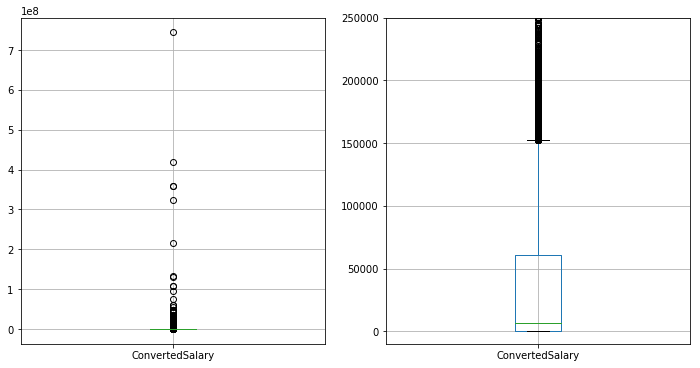

Cantidad de valores atípicos: 4187. Inicio de los valores atípicos: 152740.0


In [88]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

fig, axarr = plt.subplots(1, 2, figsize=(12, 6))

ax1 = df.boxplot(column='ConvertedSalary', ax=axarr[0])

ax2, bp  = df.boxplot(column='ConvertedSalary', return_type='both', ax=axarr[1])
ax2.set_ylim(-10000, 2.5e5)

plt.show()

outliers = [flier.get_ydata() for flier in bp["fliers"]]
first_outlier = sorted(outliers[0])[0]
print("Cantidad de valores atípicos: {}.".format(len(outliers[0])), 
      "Inicio de los valores atípicos:", first_outlier)

<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En la gráfica de la izquierda puede apreciarse una gran cantidad de valores atípicos, al grado de ocultar por completo la caja. Una sospecha natural es que estos valores sean una broma del encuestado. Analicemos la relación entre los valores atípicos y la variable 'Hobby':
</div>

In [89]:
df1 = df.loc[(df.ConvertedSalary >= first_outlier) & (df.Hobby == 'Yes')]
print("Valores atípicos en 'ConvertedSalary' para programadores por hobby:", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

Valores atípicos en 'ConvertedSalary' para programadores por hobby: 3391 (3.44%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Como puede apreciarse, una gran parte de los valores atípicos corresponden a registros con 'Hobby' = 'Yes'. Incluso el valor mínimo de la variable en este conjunto de datos está muy por arriba del salario anual promedio. Realizamos una imputación a cero para estos valores:
</div>

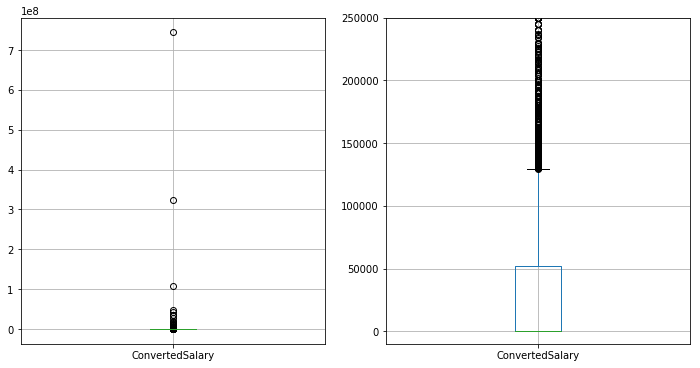

Cantidad de valores atípicos: 2870. Inicio de los valores atípicos: 129391.0


In [90]:
df['ConvertedSalary'] = df.apply(lambda row: 0 
                                 if (row.ConvertedSalary >= first_outlier) 
                                 & (row.Hobby == 'Yes')
                                 else row['ConvertedSalary'], axis=1)

fig, axarr = plt.subplots(1, 2, figsize=(12, 6))

ax1 = df.boxplot(column='ConvertedSalary', ax=axarr[0])

ax2, bp  = df.boxplot(column='ConvertedSalary', return_type='both', ax=axarr[1])
ax2.set_ylim(-10000, 2.5e5)

plt.show()

outliers = [flier.get_ydata() for flier in bp["fliers"]]
first_outlier = sorted(outliers[0])[0]
print("Cantidad de valores atípicos: {}.".format(len(outliers[0])), 
      "Inicio de los valores atípicos:", first_outlier)

<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Después de la limpieza anterior, aún sigue habiendo datos claramente defectuosos. No es seguro eliminar todos los valores atípicos restantes, modificados ahora por la nueva distribución, ya que pueden ser reales, pero si se puede tomar la decisión de eliminar todos los valores por arriba de \$200,000.00 USD anuales:
</div>

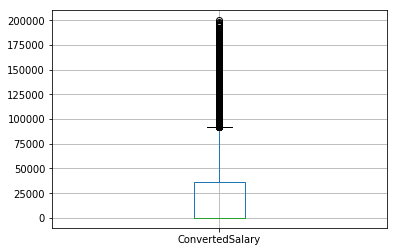

Cantidad de valores atípicos: 3000. Inicio de los valores atípicos: 91791.0


In [91]:
df['ConvertedSalary'] = df.apply(lambda row: 0 
                                 if (row.ConvertedSalary >= 2e5) 
                                 | ((row.ConvertedSalary >= 1.e5) & (row.Hobby == 'Yes'))
                                 else row['ConvertedSalary'], axis=1)

_, bp  = df.boxplot(column='ConvertedSalary', return_type='both')
plt.show()

outliers = [flier.get_ydata() for flier in bp["fliers"]]
first_outlier = sorted(outliers[0])[0]
print("Cantidad de valores atípicos: {}.".format(len(outliers[0])), 
      "Inicio de los valores atípicos:", first_outlier)

<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Finalmente, una vez agotado el tratamiento de la variable 'ConvertedSalary', las variables relacionadas, 'Salary', 'SalaryType' y 'CurrencySymbol' carecen de valor real (para los objetivos del negocio), por lo que podemos descartarlas.
</div>

In [92]:
df = df.drop([ 'Salary', 'SalaryType', 'CurrencySymbol'], axis=1)

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
CompanySize:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La variable 'CompanySize' tiene sentido sólo si el encuestado está empleado, por lo que es de esperar una relación importante entre los valores faltantes en esta variable y las variables 'Hobby', 'Student' y 'Employment': 
</div>
</div>

In [93]:
print("Valores faltantes en 'CompanySize':", sum(pd.isnull(df['CompanySize'])),
     "(" + str(round(10000*sum(pd.isnull(df['CompanySize'])) / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.CompanySize)) 
             & ((df.Hobby == 'Yes') 
                | (df.Student == 'Yes, full-time')
                | (df.Employment == 'Retired')
                | (df.Employment == 'Not employed, but looking for work')
                | (df.Employment == 'Not employed, and not looking for work'))]
print("Valores faltantes en 'CompanySize' para no empleados:", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

Valores faltantes en 'CompanySize': 26912 (27.34%)
Valores faltantes en 'CompanySize' para no empleados: 24106 (24.49%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Hagamos una imputación al valor 'None' para estos registros:
</div>

In [94]:
df['CompanySize'] = df.apply(lambda row: 'None'
                             if pd.isnull(row.CompanySize) 
                             & ((row.Hobby == 'Yes') 
                                | (row.Student == 'Yes, full-time')
                                | (row.Employment == 'Retired')
                                | (row.Employment == 'Not employed, but looking for work')
                                | (row.Employment == 'Not employed, and not looking for work'))
                             else row['CompanySize'], axis=1)

print("Valores faltantes en 'CompanySize':", sum(pd.isnull(df['CompanySize'])),
     "(" + str(round(10000*sum(pd.isnull(df['CompanySize'])) / df.shape[0]) / 100)+"%)")

data = get_counters(df['CompanySize'].dropna(), "Tamaño de la compañía")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.CompanySize), axis=1)
display(HTML(data.to_html()))

Valores faltantes en 'CompanySize': 2806 (2.85%)


,Tamaño de la compañía,Participantes,Porcentaje
0,None,24106,25.205726
1,20 to 99 employees,16996,17.771365
2,100 to 499 employees,14011,14.650188
3,"10,000 or more employees",9757,10.202118
4,10 to 19 employees,8007,8.372283
5,"1,000 to 4,999 employees",7634,7.982266
6,Fewer than 10 employees,7479,7.820195
7,500 to 999 employees,4630,4.841223
8,"5,000 to 9,999 employees",3017,3.154637


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Puesto que ahora, los valores faltantes es muy inferior a 5%, podemos hacer una imputación simple; hagamos una imputación al valor 'None' (la moda y valor mínimo) para estos registros:
</div>

In [95]:
df['CompanySize'] = df.apply(lambda row: 'None'
                             if pd.isnull(row.CompanySize) 
                             else row['CompanySize'], axis=1)

print("Valores faltantes en 'CompanySize':", sum(pd.isnull(df['CompanySize'])),
     "(" + str(round(10000*sum(pd.isnull(df['CompanySize'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'CompanySize': 0 (0.0%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Para el resto de registros no tenemos elementos suficientes para una imputación.
</div>

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:30%; float:left; padding-right:5px; color:blue; font-weight: bold;">
AdBlocker<br>
AdBlockerDisable<br>
AdBlockerReasons<br>
AdsAgreeDisagree1-3<br>
AdsActions<br>
AdsPriorities1-7<br>
</div>

<div style="margin-left: 30%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Estas variables tienen grandes cantidades de valores faltantes y es uno de los intereses importantes para la empresa. Sin embargo, no hay muchos elementos para limpiar estas variables.
<br>Analicemos su distribución:
</div>
</div>

In [96]:
print(df[['AdBlocker', 'AdBlockerDisable', 'AdBlockerReasons', 'AdsAgreeDisagree1', 
          'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsActions', 'AdsPriorities1',
         'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5',
         'AdsPriorities6', 'AdsPriorities7']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98443 entries, 0 to 98442
Data columns (total 14 columns):
AdBlocker            76055 non-null object
AdBlockerDisable     54898 non-null object
AdBlockerReasons     37745 non-null object
AdsAgreeDisagree1    74485 non-null object
AdsAgreeDisagree2    74413 non-null object
AdsAgreeDisagree3    74414 non-null object
AdsActions           59514 non-null object
AdsPriorities1       60479 non-null float64
AdsPriorities2       60479 non-null float64
AdsPriorities3       60479 non-null float64
AdsPriorities4       60479 non-null float64
AdsPriorities5       60479 non-null float64
AdsPriorities6       60479 non-null float64
AdsPriorities7       60479 non-null float64
dtypes: float64(7), object(7)
memory usage: 10.5+ MB
None


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Analicemos la relación entre 'AdBlocker' y 'AdBlockerDisable':
</div>

In [97]:
df1 = df.loc[pd.isnull(df.AdBlockerDisable)
             & pd.notnull(df.AdBlocker) & (df.AdBlocker == 'No') ]
print("Valores faltantes en 'AdBlockerDisable' para 'AdBlocker' negativo:", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

Valores faltantes en 'AdBlockerDisable' para 'AdBlocker' negativo: 17144 (17.42%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Observemos que muchos de los valores nulos de 'AdBlockerDisable' (In the past month, have you disabled your ad blocker for any reason, even temporarily or for a specific website?) corresponden a quienes respondieron no tener habilitado un bloqueador, 'AdBlocker' Hagamos una imputación por un nuevo valor 'AdBlocker not activated':
</div>

In [98]:
df['AdBlockerDisable'] = df.apply(lambda row: 'AdBlocker not activated'
                             if pd.isnull(row.AdBlockerDisable) 
                                  & pd.notnull(row.AdBlocker) & (row.AdBlocker == 'No') 
                             else row['AdBlockerDisable'], axis=1)

print("Valores faltantes en 'AdBlockerDisable':", sum(pd.isnull(df['AdBlockerDisable'])),
     "(" + str(round(10000*sum(pd.isnull(df['AdBlockerDisable'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'AdBlockerDisable': 26401 (26.82%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La variable 'AdBlockerReasons' (What are the reasons that you have disabled your ad blocker in the past month?) tiene también una gran cantidad de valores faltantes. Es de esperar que muchos de estos valores se deban a que el encuestado no tiene habilitado una bloqueador o porque no lo ha deshabilitado. Analicemos la relación entre 'AdBlockerReasons' y las variables 'AdBlocker' y 'AdBlockerDisable':
</div>

In [99]:
df1 = df.loc[pd.isnull(df.AdBlockerReasons)
             & ((pd.notnull(df.AdBlocker) & (df.AdBlocker == 'No')) 
                 | (pd.notnull(df.AdBlockerDisable) & (df.AdBlockerDisable == 'No')))]
print("Valores faltantes en 'AdBlockerReasons' con 'AdBlockerDisable' o 'AdBlocker' \
negativos:", df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

Valores faltantes en 'AdBlockerReasons' con 'AdBlockerDisable' o 'AdBlocker' negativos: 30354 (30.83%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
El resultado previo confirma la hipótesis; hagamos una imputación a la etiquetas 'AdBlocker not activated' y 'AdBlocker not disabled', según sea el caso:
</div>

In [100]:
def clean_adblocker(row):
    if pd.notnull(row.AdBlocker) & (row.AdBlocker == 'No'):
        return 'AdBlocker not activated'
    elif pd.notnull(row.AdBlockerDisable) & (row.AdBlockerDisable == 'No'):
        return 'AdBlocker not disabled'
    else:
        return np.nan

df['AdBlockerReasons'] = df.apply(lambda row: clean_adblocker(row) 
                                 if pd.isnull(row.AdBlockerReasons)
                                 else row['AdBlockerReasons'], axis=1)

print("Valores faltantes en 'AdBlockerDisable':", sum(pd.isnull(df['AdBlockerDisable'])),
     "(" + str(round(10000*sum(pd.isnull(df['AdBlockerDisable'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'AdBlockerDisable': 26401 (26.82%)


In [101]:
print(df[['AdBlocker', 'AdBlockerDisable', 'AdBlockerReasons', 'AdsAgreeDisagree1', 
          'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsActions', 'AdsPriorities1',
         'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5',
         'AdsPriorities6', 'AdsPriorities7']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98443 entries, 0 to 98442
Data columns (total 14 columns):
AdBlocker            76055 non-null object
AdBlockerDisable     72042 non-null object
AdBlockerReasons     68099 non-null object
AdsAgreeDisagree1    74485 non-null object
AdsAgreeDisagree2    74413 non-null object
AdsAgreeDisagree3    74414 non-null object
AdsActions           59514 non-null object
AdsPriorities1       60479 non-null float64
AdsPriorities2       60479 non-null float64
AdsPriorities3       60479 non-null float64
AdsPriorities4       60479 non-null float64
AdsPriorities5       60479 non-null float64
AdsPriorities6       60479 non-null float64
AdsPriorities7       60479 non-null float64
dtypes: float64(7), object(7)
memory usage: 10.5+ MB
None


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
No parece que se puedan reducir los valores faltantes restantes en estas variables, sin tomar riesgos excesivos.
</div>

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
JobSatisfaction:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La variable 'JobSatisfaction' tiene sentido sólo si el encuestado está empleado, por lo que es de esperar una relación importante entre los valores faltantes en esta variable y las variables 'Hobby' y 'Student': 
</div>
</div>

In [102]:
print("Valores faltantes en 'JobSatisfaction':", sum(pd.isnull(df['JobSatisfaction'])),
     "(" + str(round(10000*sum(pd.isnull(df['JobSatisfaction'])) / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.JobSatisfaction)) 
             & ((df.Hobby == 'Yes') 
                | (df.Student == 'Yes, full-time'))]
print("Valores faltantes en 'JobSatisfaction' para no profesionales:", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

Valores faltantes en 'JobSatisfaction': 29167 (29.63%)
Valores faltantes en 'JobSatisfaction' para no profesionales: 25349 (25.75%)


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Como puede apreciarse, gran parte de los registros nulos en 'JobSatisfaction' coinciden con quienes contestaron programar por hobby o que son estudiantes. La respuesta más adecuada pudiera ser 'Neither satisfied nor dissatisfied', ya que es un valor neutral, sin embargo no es la intención del encuestador. Hagamos una imputación a la nueva etiqueta 'Not a professional developer':
</div>

In [103]:
df['JobSatisfaction'] = df.apply(lambda row: 'Not a professional developer'
                             if pd.isnull(row.JobSatisfaction) 
                             & ((row.Hobby == 'Yes') 
                                | (row.Student == 'Yes, full-time'))
                             else row['JobSatisfaction'], axis=1)

print("Valores faltantes en 'JobSatisfaction':", sum(pd.isnull(df['JobSatisfaction'])),
     "(" + str(round(10000*sum(pd.isnull(df['JobSatisfaction'])) / df.shape[0]) / 100)+"%)")

data = get_counters(df['JobSatisfaction'].dropna(), "Satisfacción en el empleo")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.CompanySize), axis=1)
display(HTML(data.to_html()))

Valores faltantes en 'JobSatisfaction': 3818 (3.88%)


,Satisfacción en el empleo,Participantes,Porcentaje
0,Moderately satisfied,26005,26.416302
1,Not a professional developer,25349,25.749926
2,Extremely satisfied,12436,12.632691
3,Slightly satisfied,10012,10.170352
4,Slightly dissatisfied,7057,7.168615
5,Moderately dissatisfied,6318,6.417927
6,Neither satisfied nor dissatisfied,4966,5.044544
7,Extremely dissatisfied,2482,2.521256


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Los valores faltantes restantes están por abajo del 5%, por lo que podemos hacer una imputación simple. Utilizamos el valor 'Neither satisfied nor dissatisfied' que, como ya argumentamos, es un valor neutral:
</div>

In [104]:
df['JobSatisfaction'] = df.apply(lambda row: 'Neither satisfied nor dissatisfied'
                             if pd.isnull(row.JobSatisfaction) 
                             else row['JobSatisfaction'], axis=1)

print("Valores faltantes en 'JobSatisfaction':", sum(pd.isnull(df['JobSatisfaction'])),
     "(" + str(round(10000*sum(pd.isnull(df['JobSatisfaction'])) / df.shape[0]) / 100)+"%)")

Valores faltantes en 'JobSatisfaction': 0 (0.0%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
CareerSatisfaction:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
La variable 'CareerSatisfaction' tiene una naturaleza similar a 'JobSatisfaction'; hagamos el mismo tratamiento: 
</div>
</div>

In [105]:
print("Valores faltantes en 'CareerSatisfaction':", sum(pd.isnull(df['CareerSatisfaction'])),
     "(" + str(round(10000*sum(pd.isnull(df['CareerSatisfaction'])) / df.shape[0]) / 100)+"%)")

df1 = df.loc[(pd.isnull(df.CareerSatisfaction)) 
             & ((df.Hobby == 'Yes') 
                | (df.Student == 'Yes, full-time'))]
print("Valores faltantes en 'CareerSatisfaction' para no profesionales:", 
      df1.shape[0], "(" + str(round(10000*df1.shape[0] / df.shape[0]) / 100)+"%)")

Valores faltantes en 'CareerSatisfaction': 21939 (22.29%)
Valores faltantes en 'CareerSatisfaction' para no profesionales: 18611 (18.91%)


In [106]:
df['CareerSatisfaction'] = df.apply(lambda row: 'Not a professional developer'
                             if pd.isnull(row.CareerSatisfaction) 
                             & ((row.Hobby == 'Yes') 
                                | (row.Student == 'Yes, full-time'))
                             else row['CareerSatisfaction'], axis=1)

print("Valores faltantes en 'CareerSatisfaction':", sum(pd.isnull(df['CareerSatisfaction'])),
     "(" + str(round(10000*sum(pd.isnull(df['CareerSatisfaction'])) / df.shape[0]) 
               / 100)+"%)")

data = get_counters(df['CareerSatisfaction'].dropna(), "Satisfacción en el empleo")
data['Porcentaje'] = data.apply (lambda row: percent (row, df.CompanySize), axis=1)
display(HTML(data.to_html()))

Valores faltantes en 'CareerSatisfaction': 3328 (3.38%)


,Satisfacción en el empleo,Participantes,Porcentaje
0,Moderately satisfied,27926,28.367685
1,Not a professional developer,18611,18.905356
2,Extremely satisfied,14316,14.542426
3,Slightly satisfied,13484,13.697266
4,Slightly dissatisfied,6587,6.691182
5,Neither satisfied nor dissatisfied,6316,6.415895
6,Moderately dissatisfied,5262,5.345225
7,Extremely dissatisfied,2613,2.654328


In [107]:
df['CareerSatisfaction'] = df.apply(lambda row: 'Neither satisfied nor dissatisfied'
                             if pd.isnull(row.CareerSatisfaction) 
                             else row['CareerSatisfaction'], axis=1)

print("Valores faltantes en 'CareerSatisfaction':", 
      sum(pd.isnull(df['CareerSatisfaction'])),
     "(" + str(round(10000*sum(pd.isnull(df['CareerSatisfaction'])) 
                     / df.shape[0]) / 100)+"%)")

Valores faltantes en 'CareerSatisfaction': 0 (0.0%)


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
Gender, SexualOrientation:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
En el caso de estas variables, hay una gran cantidad de valores inconsistentes, además de una gran cantidad de valores faltantes. Aunque pudiéramos tratar de interpretar los errores, por la cantidad de datos manipulados preferimos prescindir de estas variables: 
</div>
</div>

In [108]:
df = df.drop(['Gender', 'SexualOrientation'], axis=1)

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:blue; font-weight: bold;">
Valores faltantes restantes:
</div>

<div style="margin-left: 20%; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Para el caso de los valores faltantes restantes, no parece haber elementos suficientes para realizar una mayor limpieza, por lo que los conservaremos como están. Podemos, también, imputar el valor 'Non-responded' a estos valores. 
</div>
</div>

<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Después del tratamiento realizado, hagamos un último análisis de la calidad de los datos:
</div>

In [109]:
print(df.dropna().info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 31 to 80319
Columns: 120 entries, Hobby to SurveyEasy
dtypes: float64(41), object(79)
memory usage: 1.4+ MB
None


In [110]:
print(df.dropna(thresh=63).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74926 entries, 0 to 93462
Columns: 120 entries, Hobby to SurveyEasy
dtypes: float64(41), object(79)
memory usage: 69.2+ MB
None


In [111]:
missing = {}
for col in df.describe(include='all'):
    missing[col] = 100*sum(pd.isnull(df[col])) / df.shape[0]
table = sorted(missing.items(), key=itemgetter(1))

data = pd.DataFrame(table, columns=["Columna", "Valores Faltantes (%)"])
display(HTML(data.to_html()))

,Columna,Valores Faltantes (%)
0,Hobby,0.000000
1,OpenSource,0.000000
2,Country,0.000000
3,Student,0.000000
4,Employment,0.000000
5,FormalEducation,0.000000
6,CompanySize,0.000000
7,DevType,0.000000
8,YearsCoding,0.000000
9,YearsCodingProf,0.000000


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Después del tratamiento realizado, hagamos un último análisis de la calidad de los datos:
</div>

In [112]:
print(df.dropna().info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 31 to 80319
Columns: 120 entries, Hobby to SurveyEasy
dtypes: float64(41), object(79)
memory usage: 1.4+ MB
None


In [113]:
print(df.dropna(thresh=63).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74926 entries, 0 to 93462
Columns: 120 entries, Hobby to SurveyEasy
dtypes: float64(41), object(79)
memory usage: 69.2+ MB
None


<div style="margin-top: 6px; border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Por lo pronto no hacemos más limpieza. A continuación podemos emplear una estrategia basada en vecinos cercanos, por ejemplo, para mejorar los datos.
<br><br>
Finalmente, guardamos los datos modificados:
</div>

In [114]:
import pickle

# Guardar los encabezados del dataframe en el orden original
with open(path + "survey_results_public_clean.headers", 'wb') as file:  
    pickle.dump(list(df), file)

# Guardar en formato JSON (como diccionario)
df.to_json(path + "survey_results_public_clean.json", orient='records') 

<br>

<span style="color:blue; font-weight: bold;">
Conclusiones:
</span>

<div style="border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Al momento hemos eliminado gran parte de los valores faltantes y corregido también gran parte de las inconsistencias. Sin embargo, dado el carácter de los datos y la escasa estructura que presentan, es arriesgado tratar de llevar adelante más actividades de limpieza.
</div>

###### <a name="tarea_7">Tarea 7</a>

Presente el reporte de limpieza de los datos para su caso de estudio.

**Fecha de entrega**: 1 de octubre.